**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "List_combine_Log2FC.RDS"
fpath = file.path(fdiry, fname)
lst = readRDS(fpath)

lst_peak_Log2FC = lst
cat(names(lst), "\n\n")
cat(colnames(lst[[1]]), "\n\n")
for(dat in lst){
    print(dim(dat))
    print(head(dat, 3))
    cat("\n")
}

KS91_K562_ASTARRseq A001_K562_WSTARRseq Tewhey_K562_TileMPRA 

Chrom Start End Peak Region baseMean log2FoldChange lfcSE stat pvalue padj Assay 

[1] 417  12
# A tibble: 3 × 12
  Chrom     Start       End Peak    Region baseM…¹ log2F…²  lfcSE  stat   pvalue
  <chr>     <dbl>     <dbl> <chr>   <chr>    <dbl>   <dbl>  <dbl> <dbl>    <dbl>
1 chr8  126778902 126779728 chr8_1… MYC      426.    0.425 0.0658  6.45 1.10e-10
2 chr8  126782925 126783318 chr8_1… MYC       56.4   0.561 0.165   3.39 6.96e- 4
3 chr8  126804776 126805825 chr8_1… MYC      647.    0.548 0.0531 10.3  5.65e-25
# … with 2 more variables: padj <dbl>, Assay <fct>, and abbreviated variable
#   names ¹​baseMean, ²​log2FoldChange

[1] 417  12
# A tibble: 3 × 12
  Chrom    Start    End Peak  Region baseM…¹ log2F…² lfcSE   stat  pvalue   padj
  <chr>    <dbl>  <dbl> <chr> <chr>    <dbl>   <dbl> <dbl>  <dbl>   <dbl>  <dbl>
1 chr8    1.27e8 1.27e8 chr8… MYC       39.7 -0.0741 0.226 -0.327 0.743   0.891 
2 chr8    1.27e8 1.27e8 chr

In [3]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "result.rank_diff.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)
dat_rank_diff = dat

print(dim(dat))
head(dat)

[1] 417  23


Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,rank_ASTARR,rank_WSTARR,rank_TMPRA,ranknorm_ASTARR,ranknorm_WSTARR,⋯,rank_diff_WSTARR_TMPRA,ranknorm_diff_ASTARR_WSTARR,ranknorm_diff_ASTARR_TMPRA,ranknorm_diff_WSTARR_TMPRA,z_rank_diff_ASTARR_WSTARR,z_rank_diff_ASTARR_TMPRA,z_rank_diff_WSTARR_TMPRA,z_ranknorm_diff_ASTARR_WSTARR,z_ranknorm_diff_ASTARR_TMPRA,z_ranknorm_diff_WSTARR_TMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,4,4,8,0.1739130,0.1739130,⋯,-4,0.0000000,-0.1739130,-0.1739130,0.00000000,-0.06980891,-0.07729038,-3.446856e-19,-5.728829e-01,-0.6185830
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,10,13,4,0.4347826,0.5652174,⋯,9,-0.1304348,0.2608696,0.3913043,-0.05181686,0.10471337,0.17390337,-4.322971e-01,8.593243e-01,1.3918116
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,15,7,15,0.6521739,0.3043478,⋯,-8,0.3478261,0.0000000,-0.3478261,0.13817830,0.00000000,-0.15458077,1.152792e+00,-4.933219e-19,-1.2371659
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,8,12,20,0.3478261,0.5217391,⋯,-8,-0.1739130,-0.5217391,-0.3478261,-0.06908915,-0.20942674,-0.15458077,-5.763961e-01,-1.718649e+00,-1.2371659
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,3,19,14,0.1304348,0.8260870,⋯,5,-0.6956522,-0.4782609,0.2173913,-0.27635660,-0.19197451,0.09661298,-2.305584e+00,-1.575428e+00,0.7732287
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,14,17,22,0.6086957,0.7391304,⋯,-5,-0.1304348,-0.3478261,-0.2173913,-0.05181686,-0.13961783,-0.09661298,-4.322971e-01,-1.145766e+00,-0.7732287


In [4]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "result.rank_diff_tot.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)
dat_rank_diff_tot = dat

print(dim(dat))
head(dat)

[1] 417  14


Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,ranknorm_ASTARR,ranknorm_WSTARR,ranknorm_TMPRA,ranknorm_diff_ASTARR_WSTARR,ranknorm_diff_ASTARR_TMPRA,ranknorm_diff_WSTARR_TMPRA,z_ranknorm_diff_ASTARR_WSTARR,z_ranknorm_diff_ASTARR_TMPRA,z_ranknorm_diff_WSTARR_TMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,0.05995204,0.2829736,0.4436451,-0.2230216,-0.38369305,-0.1606715,-0.7261479,-1.2366712,-0.5649234
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,0.25899281,0.5179856,0.3285372,-0.2589928,-0.06954436,0.1894484,-0.8432685,-0.2241466,0.6661037
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,0.52997602,0.3573141,0.5755396,0.1726619,-0.04556355,-0.2182254,0.5621790,-0.1468547,-0.7672840
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,0.13189448,0.4700240,0.8729017,-0.3381295,-0.74100719,-0.4028777,-1.1009339,-2.3883212,-1.4165244
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,0.04796163,0.7314149,0.5299760,-0.6834532,-0.48201439,0.2014388,-2.2252918,-1.5535681,0.7082622
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,0.52038369,0.6690647,0.9088729,-0.1486811,-0.38848921,-0.2398082,-0.4840986,-1.2521295,-0.8431693


In [5]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.peaks.MYC.FADS.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
peaks = dat_region$Peak

print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


## Plot distribution (violin plot)

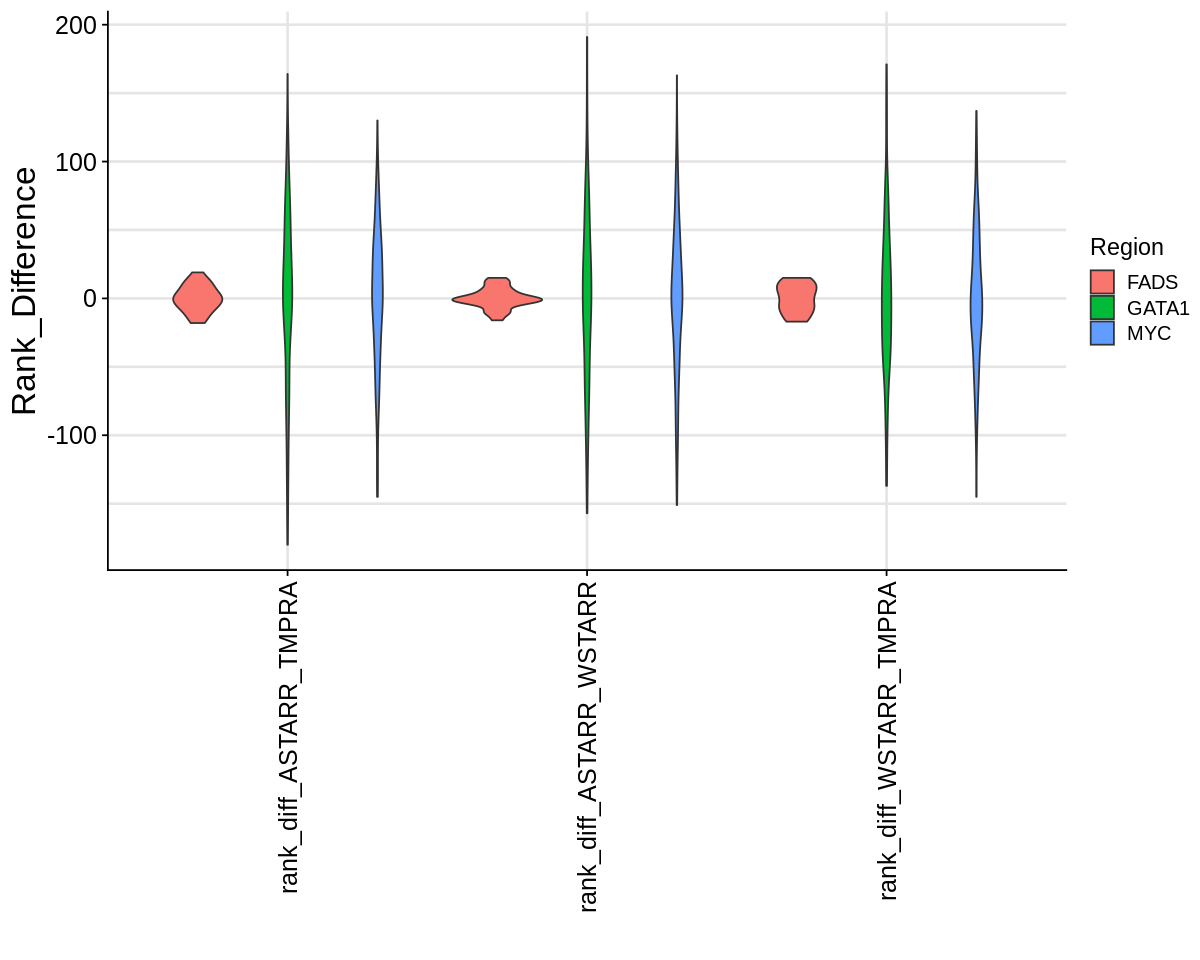

In [6]:
dat = dat_rank_diff
dat = dat %>% dplyr::select(Region, starts_with("rank_diff")) %>% gather(Assay, Rank_Difference, -Region)

gpt = ggplot(dat, aes(x=Assay, y=Rank_Difference, fill=Region)) + 
    geom_violin() + 
    labs(x="") +
    theme_cowplot() + 
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=8, repr.plot.width=10)
print(gpt)

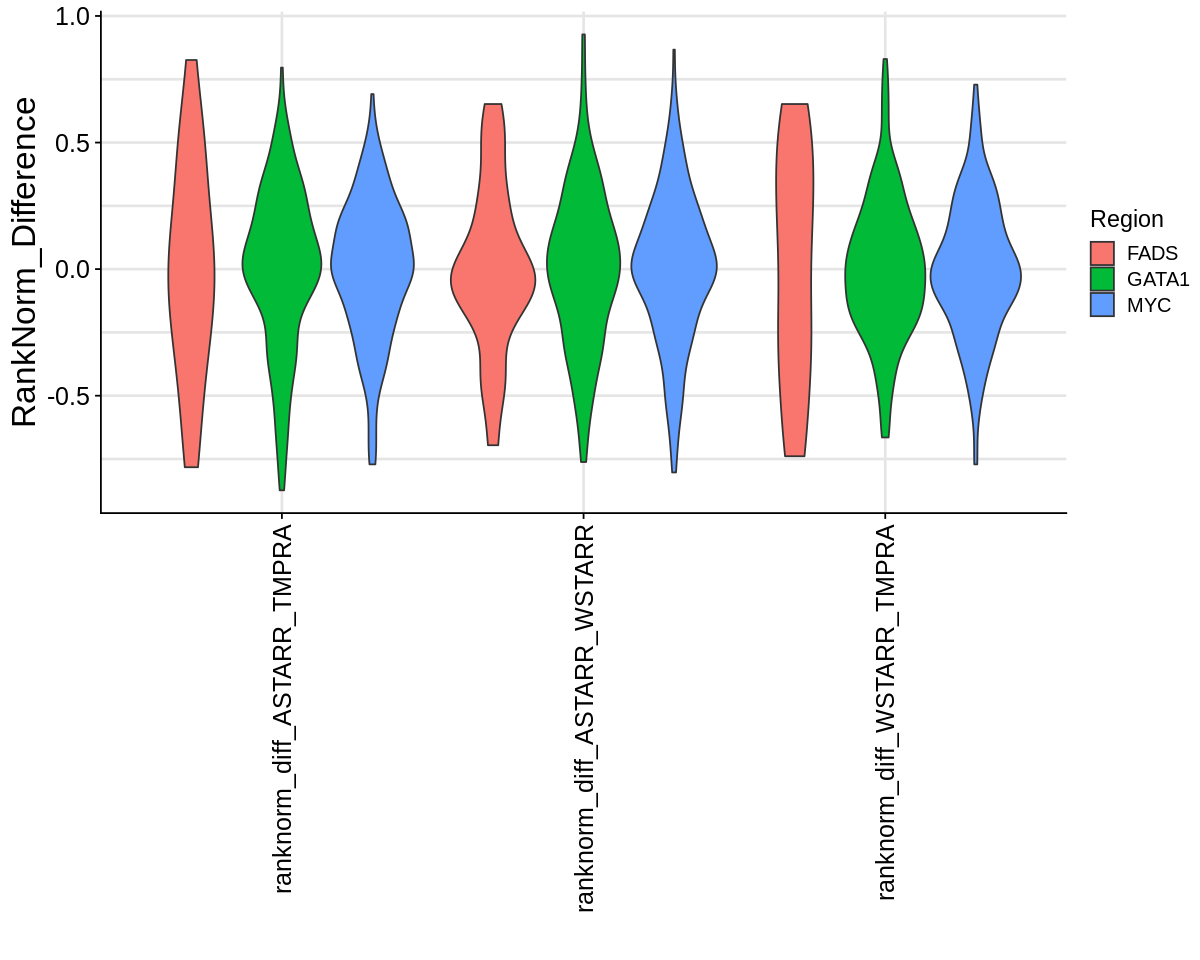

In [7]:
dat = dat_rank_diff
dat = dat %>% dplyr::select(Region, starts_with("ranknorm_diff")) %>% gather(Assay, RankNorm_Difference, -Region)

gpt = ggplot(dat, aes(x=Assay, y=RankNorm_Difference, fill=Region)) + 
    geom_violin() + 
    labs(x="") +
    theme_cowplot() + 
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=8, repr.plot.width=10)
print(gpt)

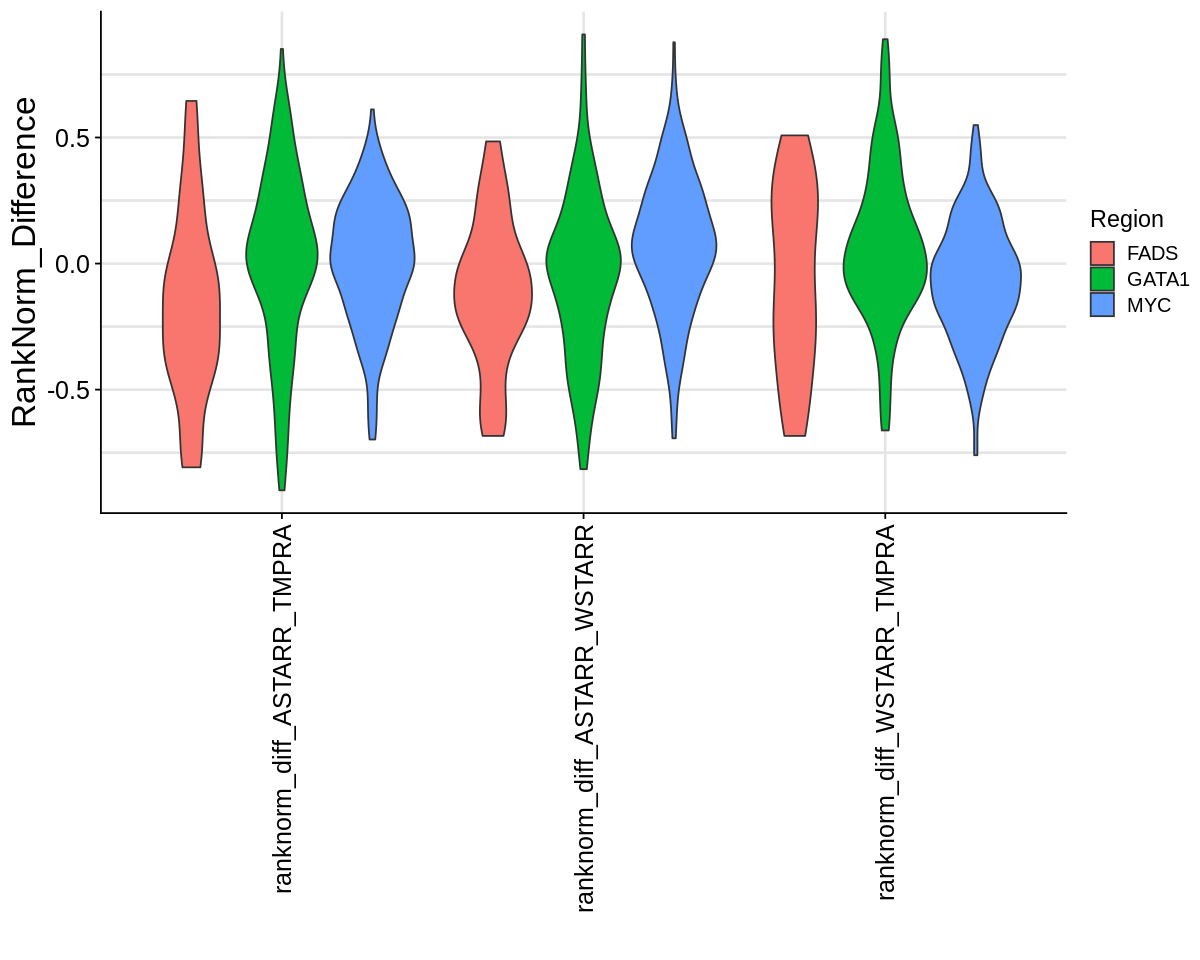

In [8]:
dat = dat_rank_diff_tot
dat = dat %>% dplyr::select(Region, starts_with("ranknorm_diff")) %>% gather(Assay, RankNorm_Difference, -Region)

gpt = ggplot(dat, aes(x=Assay, y=RankNorm_Difference, fill=Region)) + 
    geom_violin() + 
    labs(x="") +
    theme_cowplot() + 
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=8, repr.plot.width=10)
print(gpt)

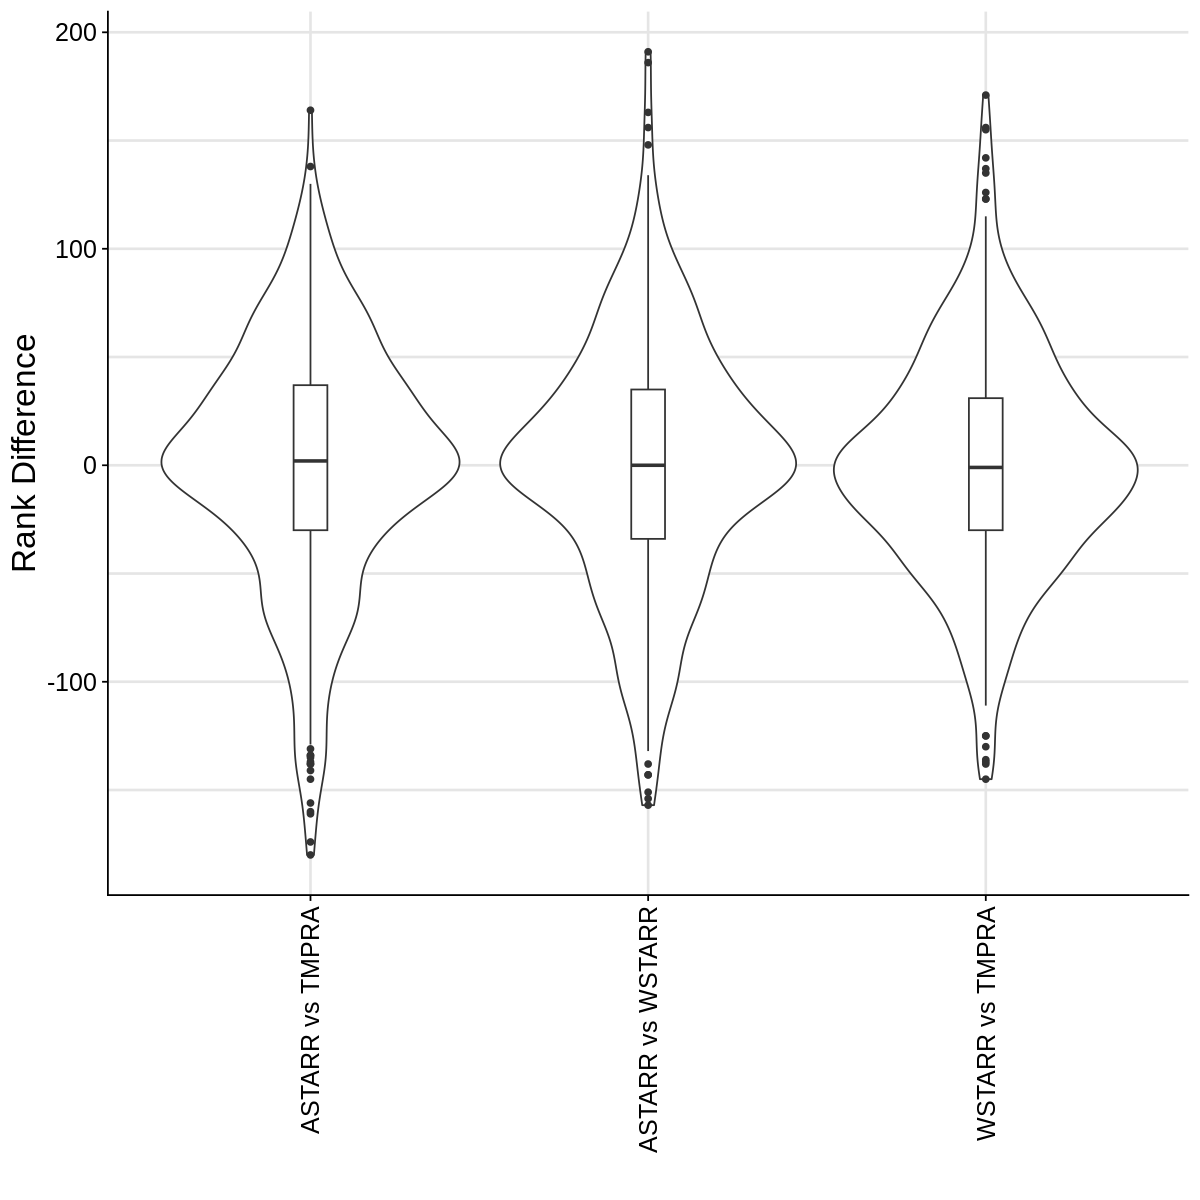

In [9]:
dat = dat_rank_diff
dat = dat %>% 
    dplyr::select(starts_with("rank_diff_")) %>%
    tidyr::gather(Assay, Value) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'rank_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'rank_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'rank_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

gpt = ggplot(dat, aes(x=Assay, y=Value)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    theme_cowplot() +
    labs(x="", y="Rank Difference") +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

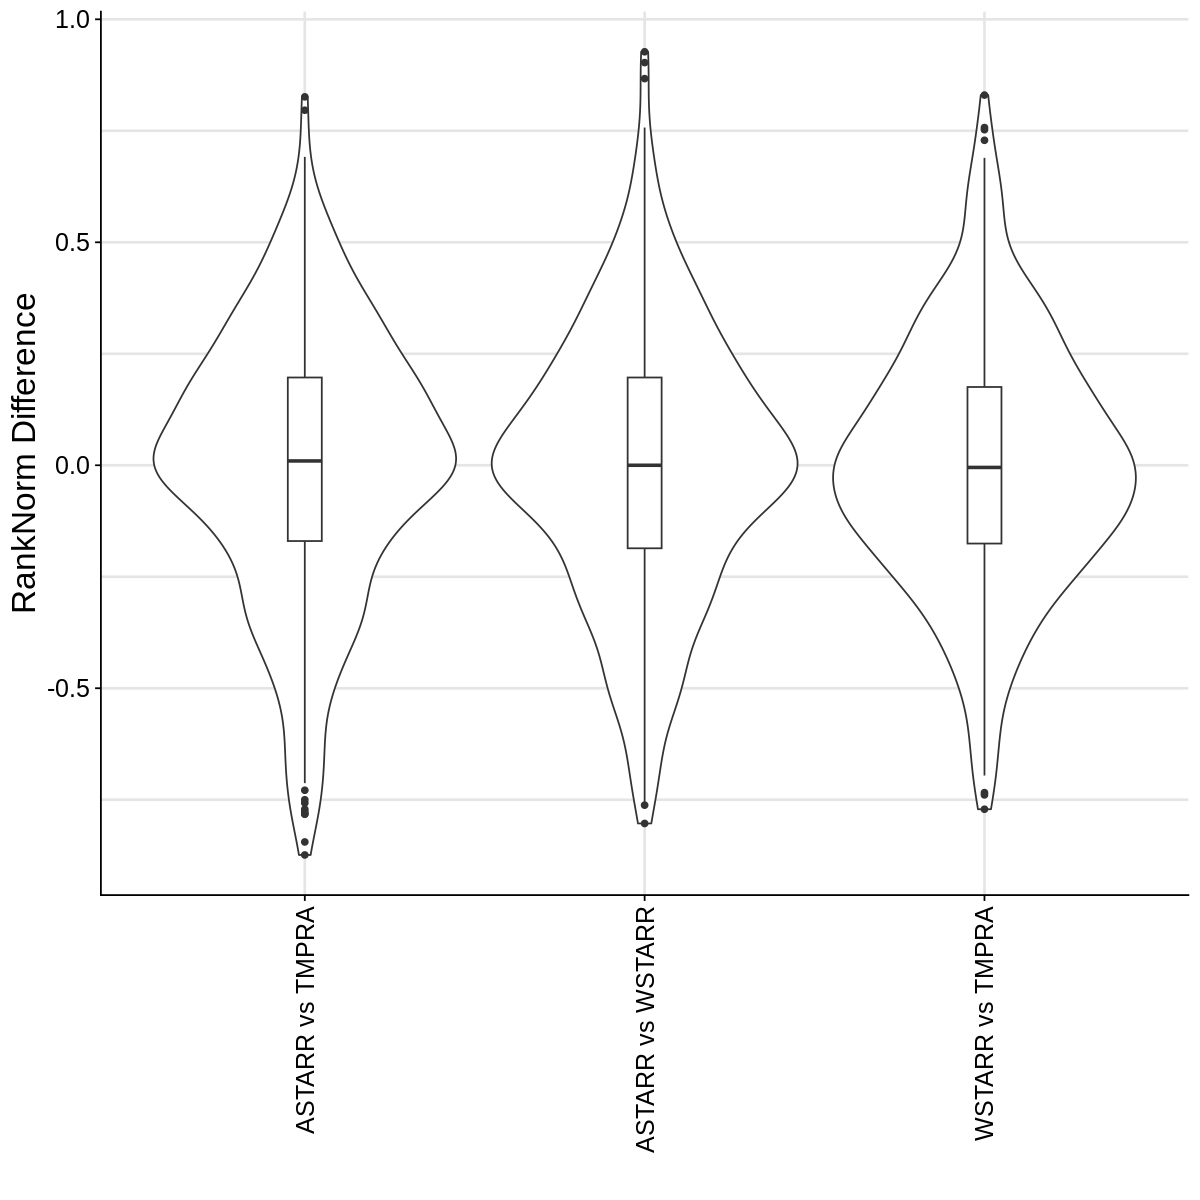

In [10]:
dat = dat_rank_diff
dat = dat %>% 
    dplyr::select(starts_with("ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

gpt = ggplot(dat, aes(x=Assay, y=Value)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    theme_cowplot() +
    labs(x="", y="RankNorm Difference") +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

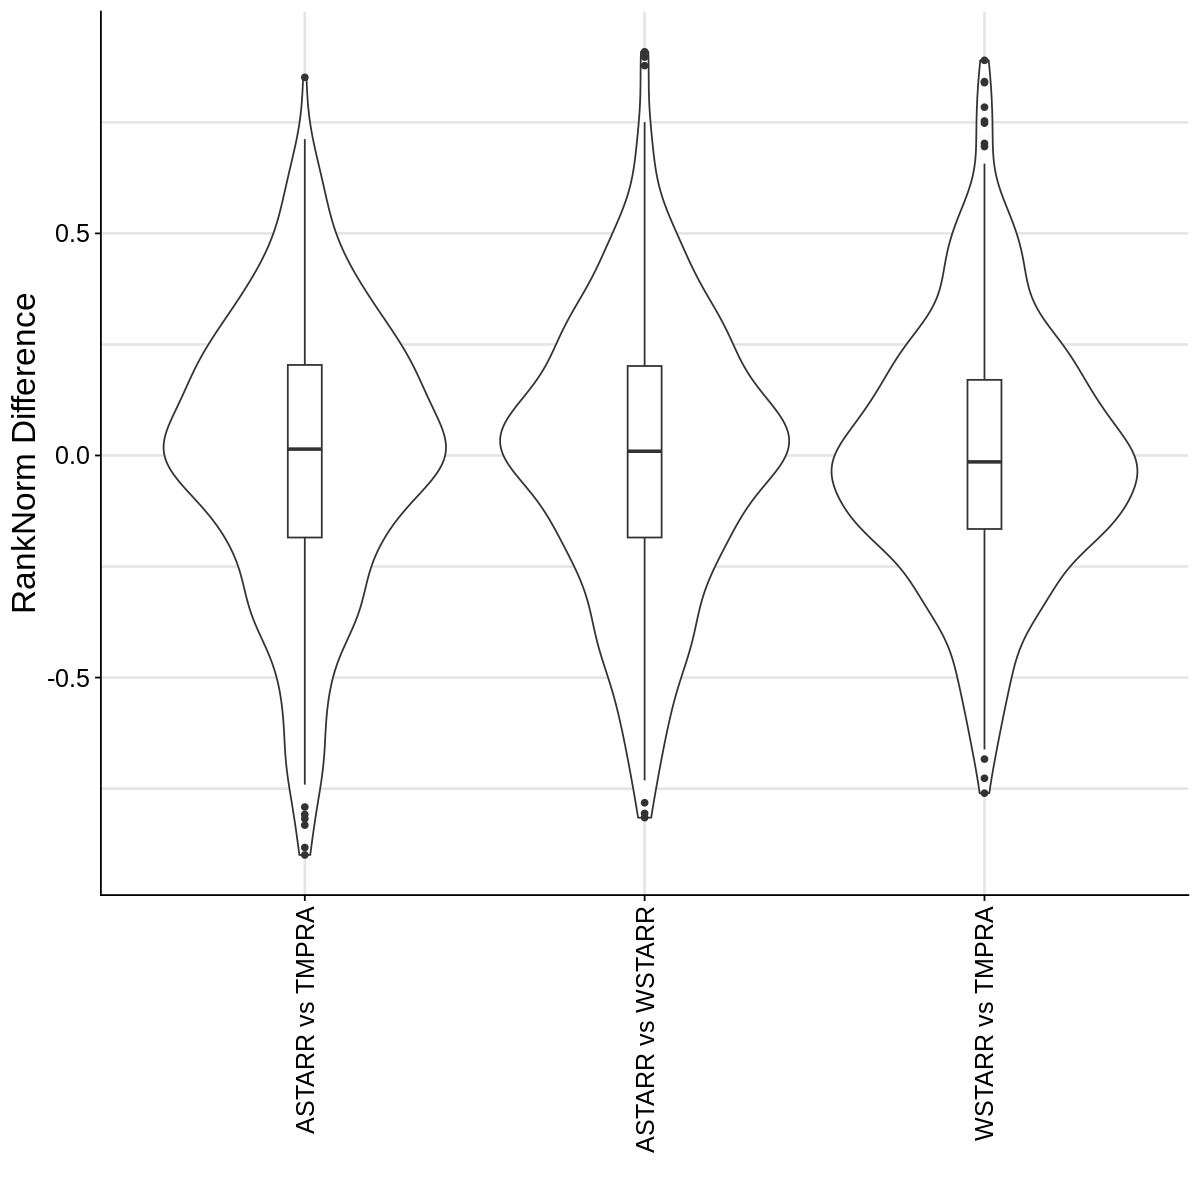

In [11]:
dat = dat_rank_diff_tot
dat = dat %>% 
    dplyr::select(starts_with("ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

gpt = ggplot(dat, aes(x=Assay, y=Value)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    theme_cowplot() +
    labs(x="", y="RankNorm Difference") +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

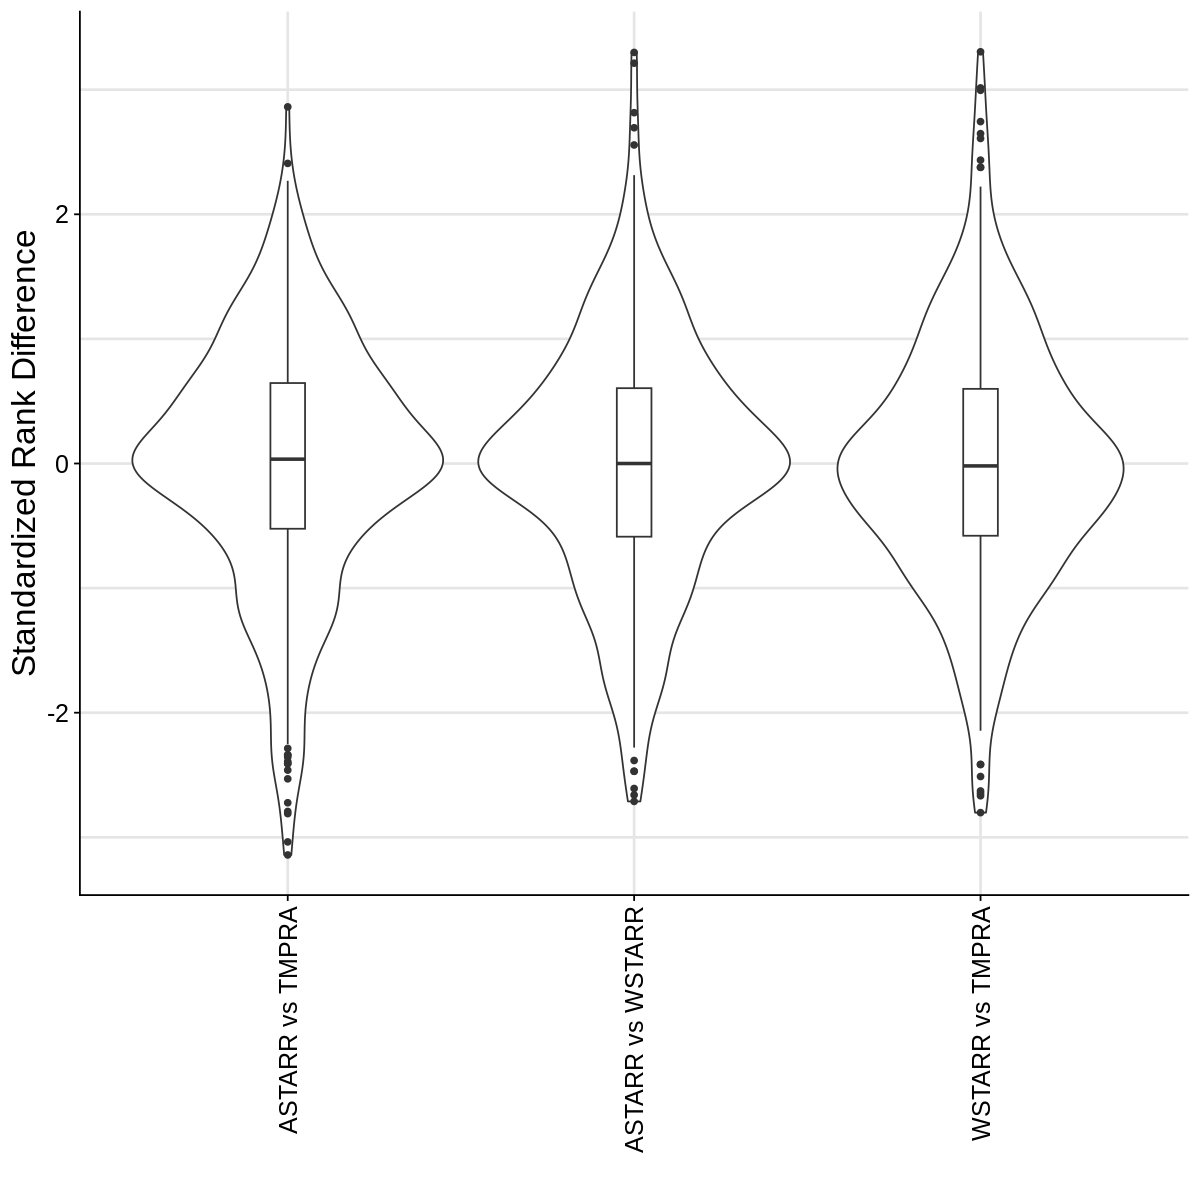

In [12]:
dat = dat_rank_diff
dat = dat %>% 
    dplyr::select(starts_with("z_rank_diff_")) %>%
    tidyr::gather(Assay, Value) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_rank_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_rank_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_rank_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

gpt = ggplot(dat, aes(x=Assay, y=Value)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    theme_cowplot() +
    labs(x="", y="Standardized Rank Difference") +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

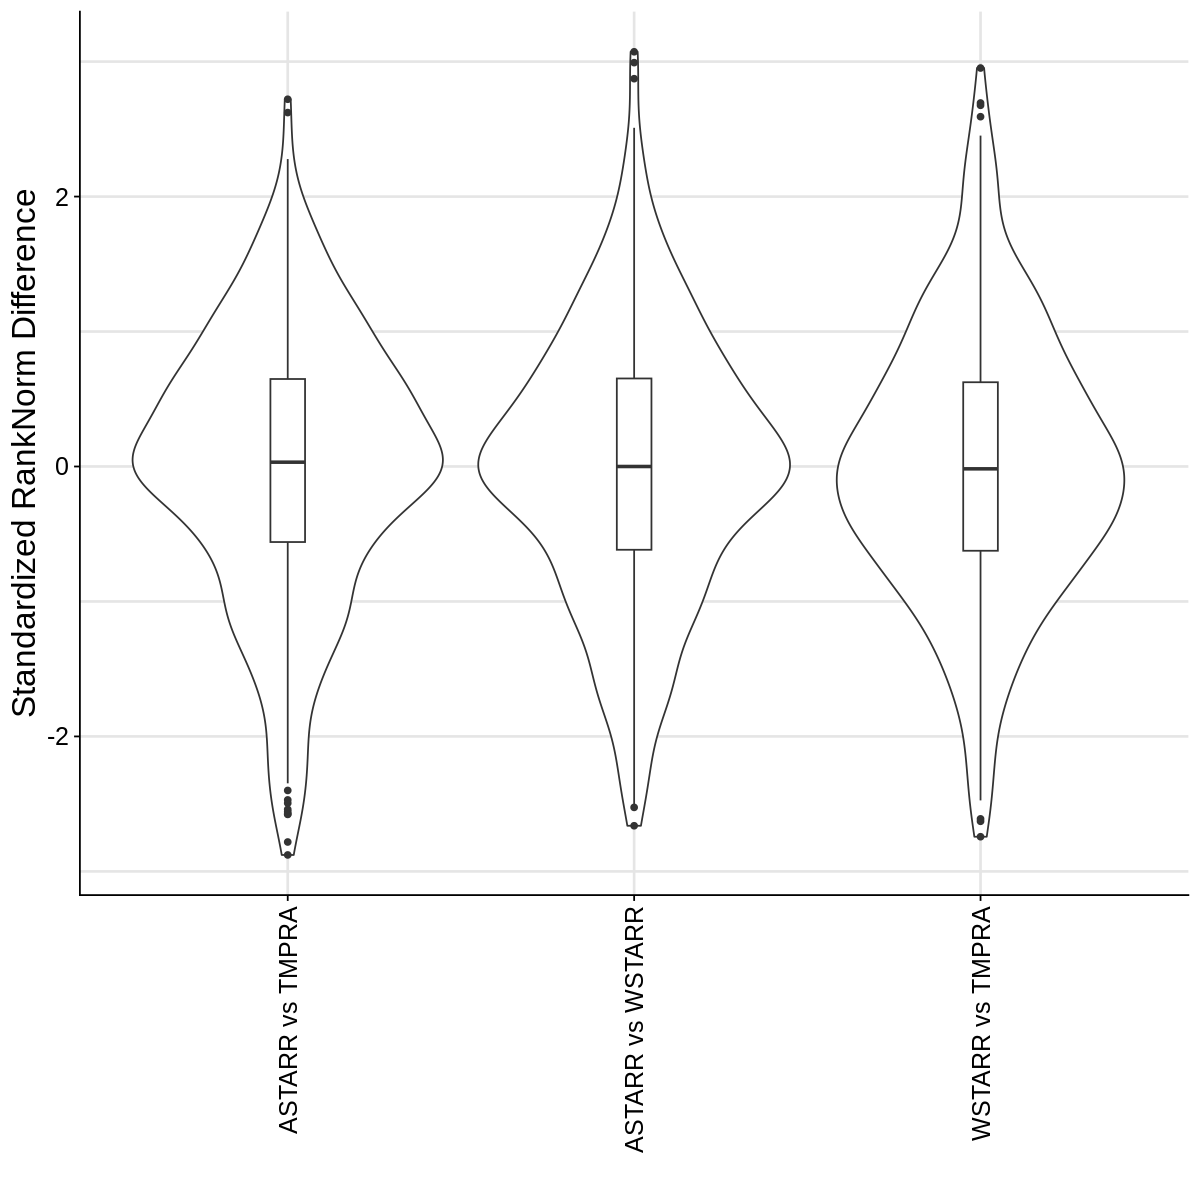

In [13]:
dat = dat_rank_diff
dat = dat %>% 
    dplyr::select(starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

gpt = ggplot(dat, aes(x=Assay, y=Value)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    theme_cowplot() +
    labs(x="", y="Standardized RankNorm Difference") +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

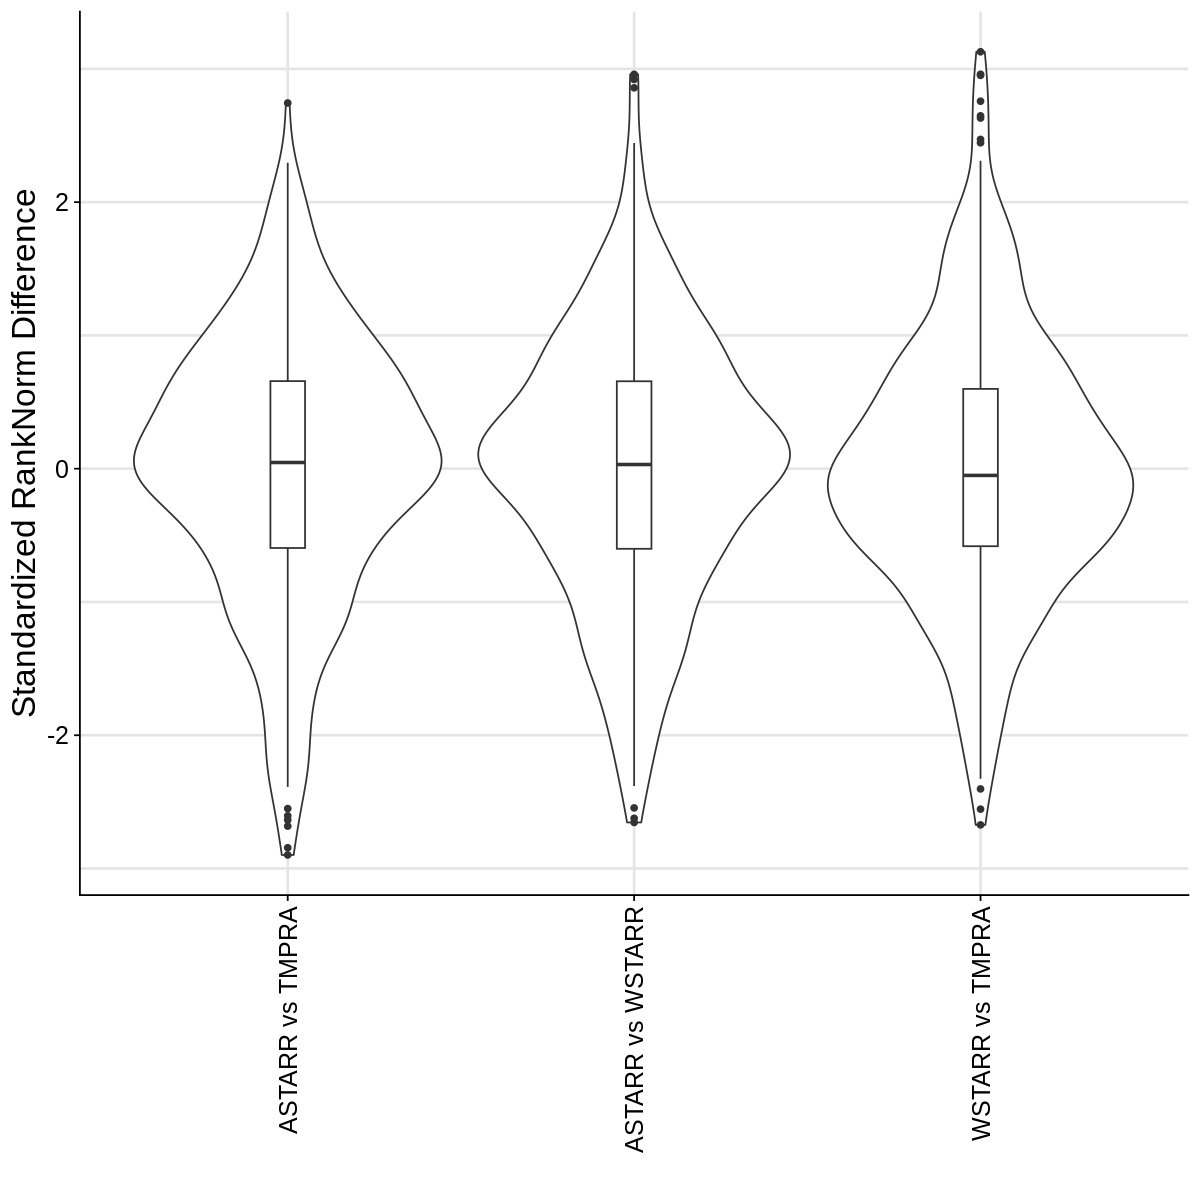

In [14]:
dat = dat_rank_diff_tot
dat = dat %>% 
    dplyr::select(starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

gpt = ggplot(dat, aes(x=Assay, y=Value)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    theme_cowplot() +
    labs(x="", y="Standardized RankNorm Difference") +
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=15, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        panel.grid = element_line(color = "grey90", linewidth = 0.75, linetype = 1))

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

## Plot Log2FoldChange heatmap

In [15]:
lst = lst_peak_Log2FC
dat = bind_rows(lst) %>% 
    dplyr::group_by(Assay) %>% 
    dplyr::mutate(Rank = rank(log2FoldChange))
head(dat)

Chrom,Start,End,Peak,Region,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Assay,Rank
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,425.57889,0.4248381,0.06583942,6.452641,1.099177e-10,9.958598e-10,KS91_K562_ASTARRseq,343
chr8,126782925,126783318,chr8_126782925_126783318,MYC,56.39778,0.5611154,0.16546379,3.391168,6.959552e-04,2.060108e-03,KS91_K562_ASTARRseq,373
chr8,126804776,126805825,chr8_126804776_126805825,MYC,646.83072,0.5479907,0.05309349,10.321241,5.648846e-25,1.350395e-23,KS91_K562_ASTARRseq,367
chr8,126817018,126817490,chr8_126817018_126817490,MYC,76.32991,-0.8449595,0.18617675,-4.538480,5.666114e-06,2.631423e-05,KS91_K562_ASTARRseq,29
chr8,126820465,126821393,chr8_126820465_126821393,MYC,205.25178,-0.4738180,0.10207383,-4.641915,3.451953e-06,1.666532e-05,KS91_K562_ASTARRseq,73
chr8,126824093,126824987,chr8_126824093_126824987,MYC,163.58060,0.4855128,0.13521500,3.590672,3.298260e-04,1.056945e-03,KS91_K562_ASTARRseq,353


In [16]:
lst = lst_peak_Log2FC
dat = bind_rows(lst) %>% 
    dplyr::group_by(Assay) %>% 
    dplyr::mutate(Value = rank(log2FoldChange)) %>%
    dplyr::select(Value, Assay, Peak) %>% 
    tidyr::spread(Peak, Value) %>%
    column_to_rownames("Assay") %>% 
    as.matrix
head(dat)

,chr11_61554569_61556228,chr11_61560645_61561556,chr11_61567108_61567997,chr11_61580592_61581826,chr11_61587170_61588742,chr11_61594868_61596571,chr11_61599147_61599901,chr11_61601718_61602065,chr11_61602703_61603919,chr11_61610154_61611940,⋯,chrX_49754378_49754670,chrX_49828982_49829610,chrX_49836520_49837095,chrX_49838489_49838861,chrX_49840468_49841285,chrX_49856806_49857279,chrX_49860981_49861475,chrX_49862119_49862823,chrX_49868244_49869175,chrX_49878402_49880117
KS91_K562_ASTARRseq,25,108,221,55,20,217,277,179,326,135,⋯,72,30,14,345,387,271,298,380,332,168
A001_K562_WSTARRseq,118,216,149,196,305,279,343,233,338,153,⋯,237,232,68,240,272,182,150,326,208,373
Tewhey_K562_TileMPRA,185,137,240,364,221,379,183,97,202,160,⋯,140,377,16,63,161,168,46,390,153,394


In [17]:
rownames(dat) = c("ASTARR", "WSTARR", "TMPRA")

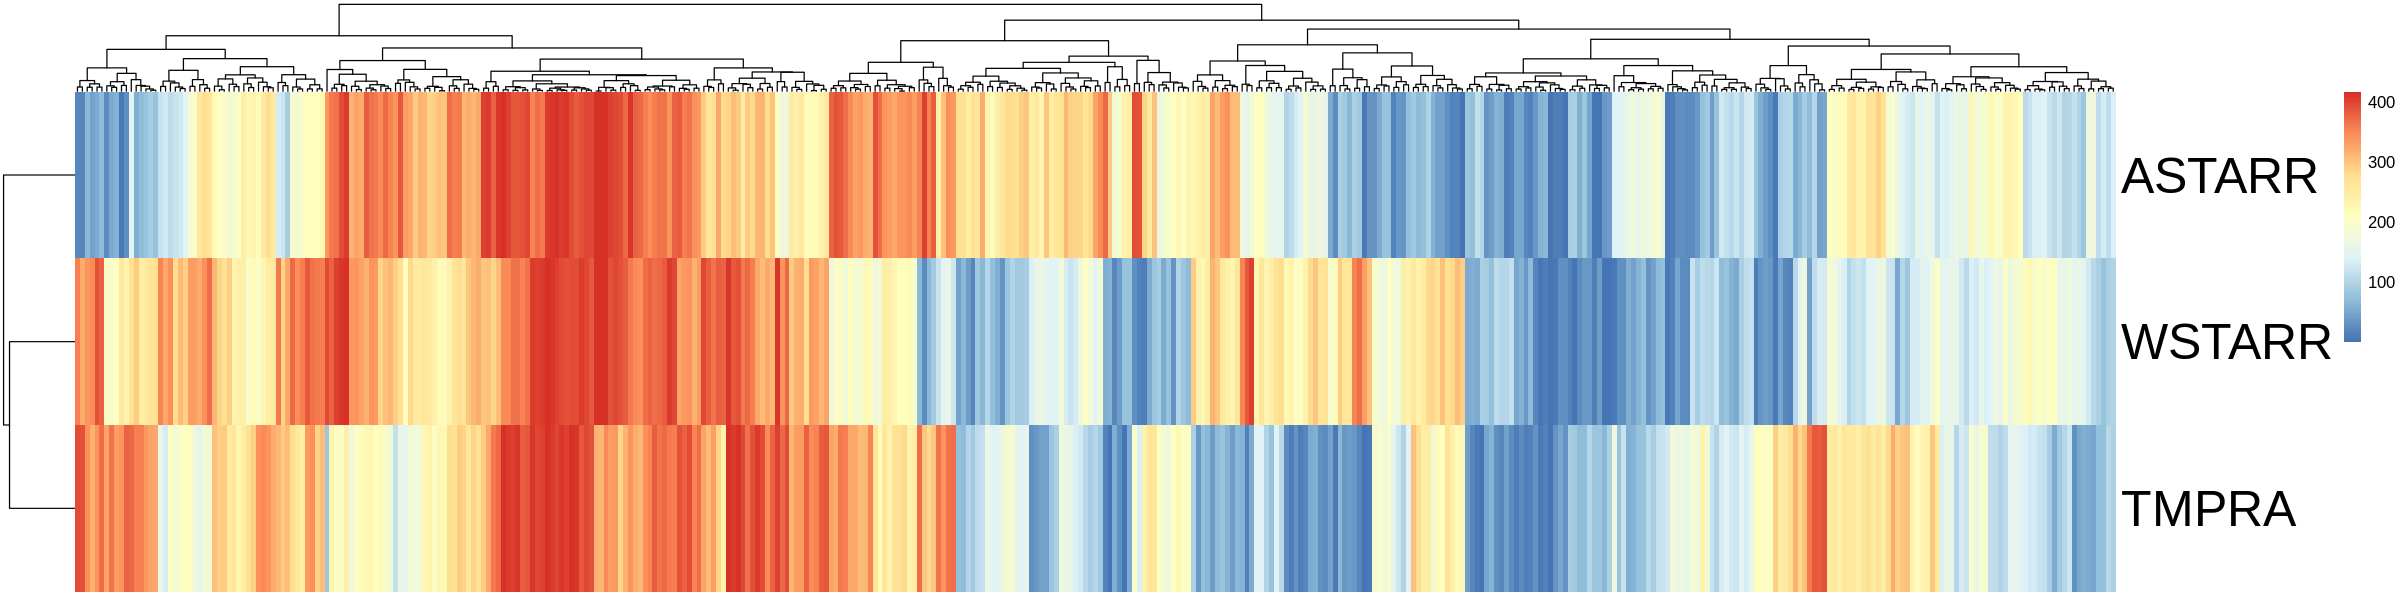

In [18]:
options(repr.plot.height=5, repr.plot.width=20)
pheatmap(dat, show_colnames = FALSE, fontsize_row=30, treeheight_row = 40)

## Plot Log2FoldChange bar plot

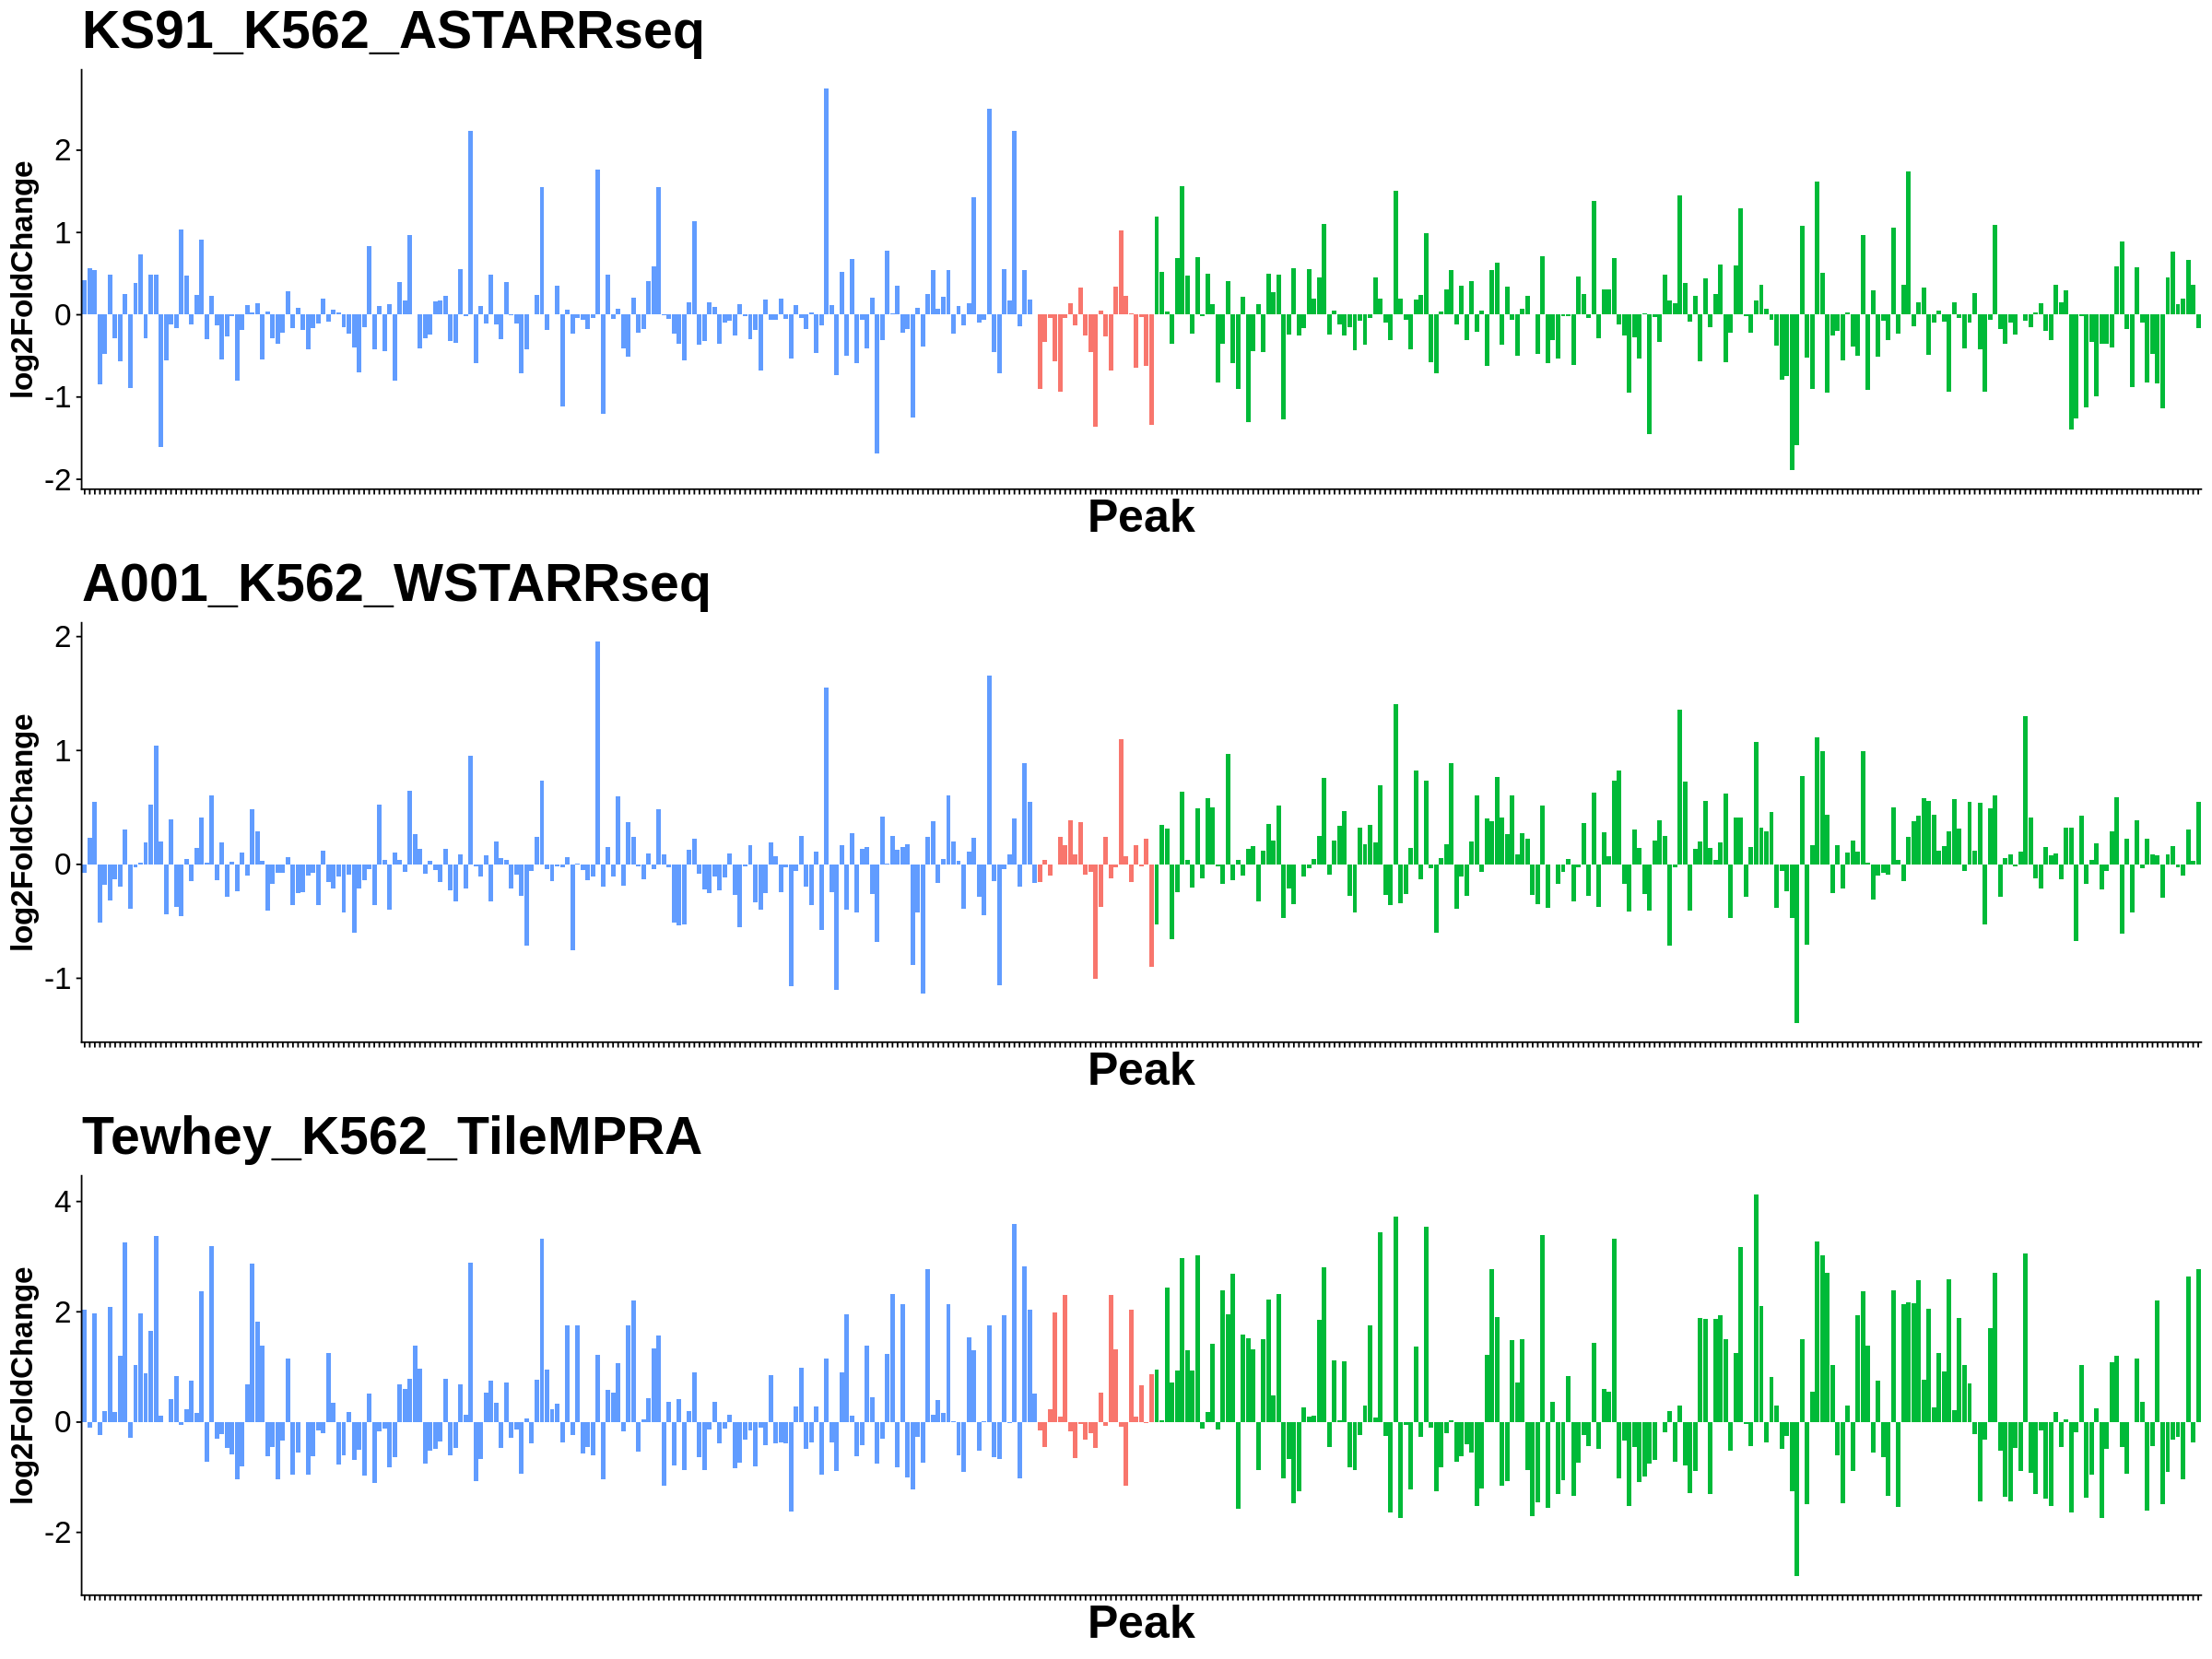

In [19]:
lst = lst_peak_Log2FC
lst_gpt_Log2FC = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=log2FoldChange, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt) +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_Log2FC, ncol=1, align = "v")

## Plot Rank difference

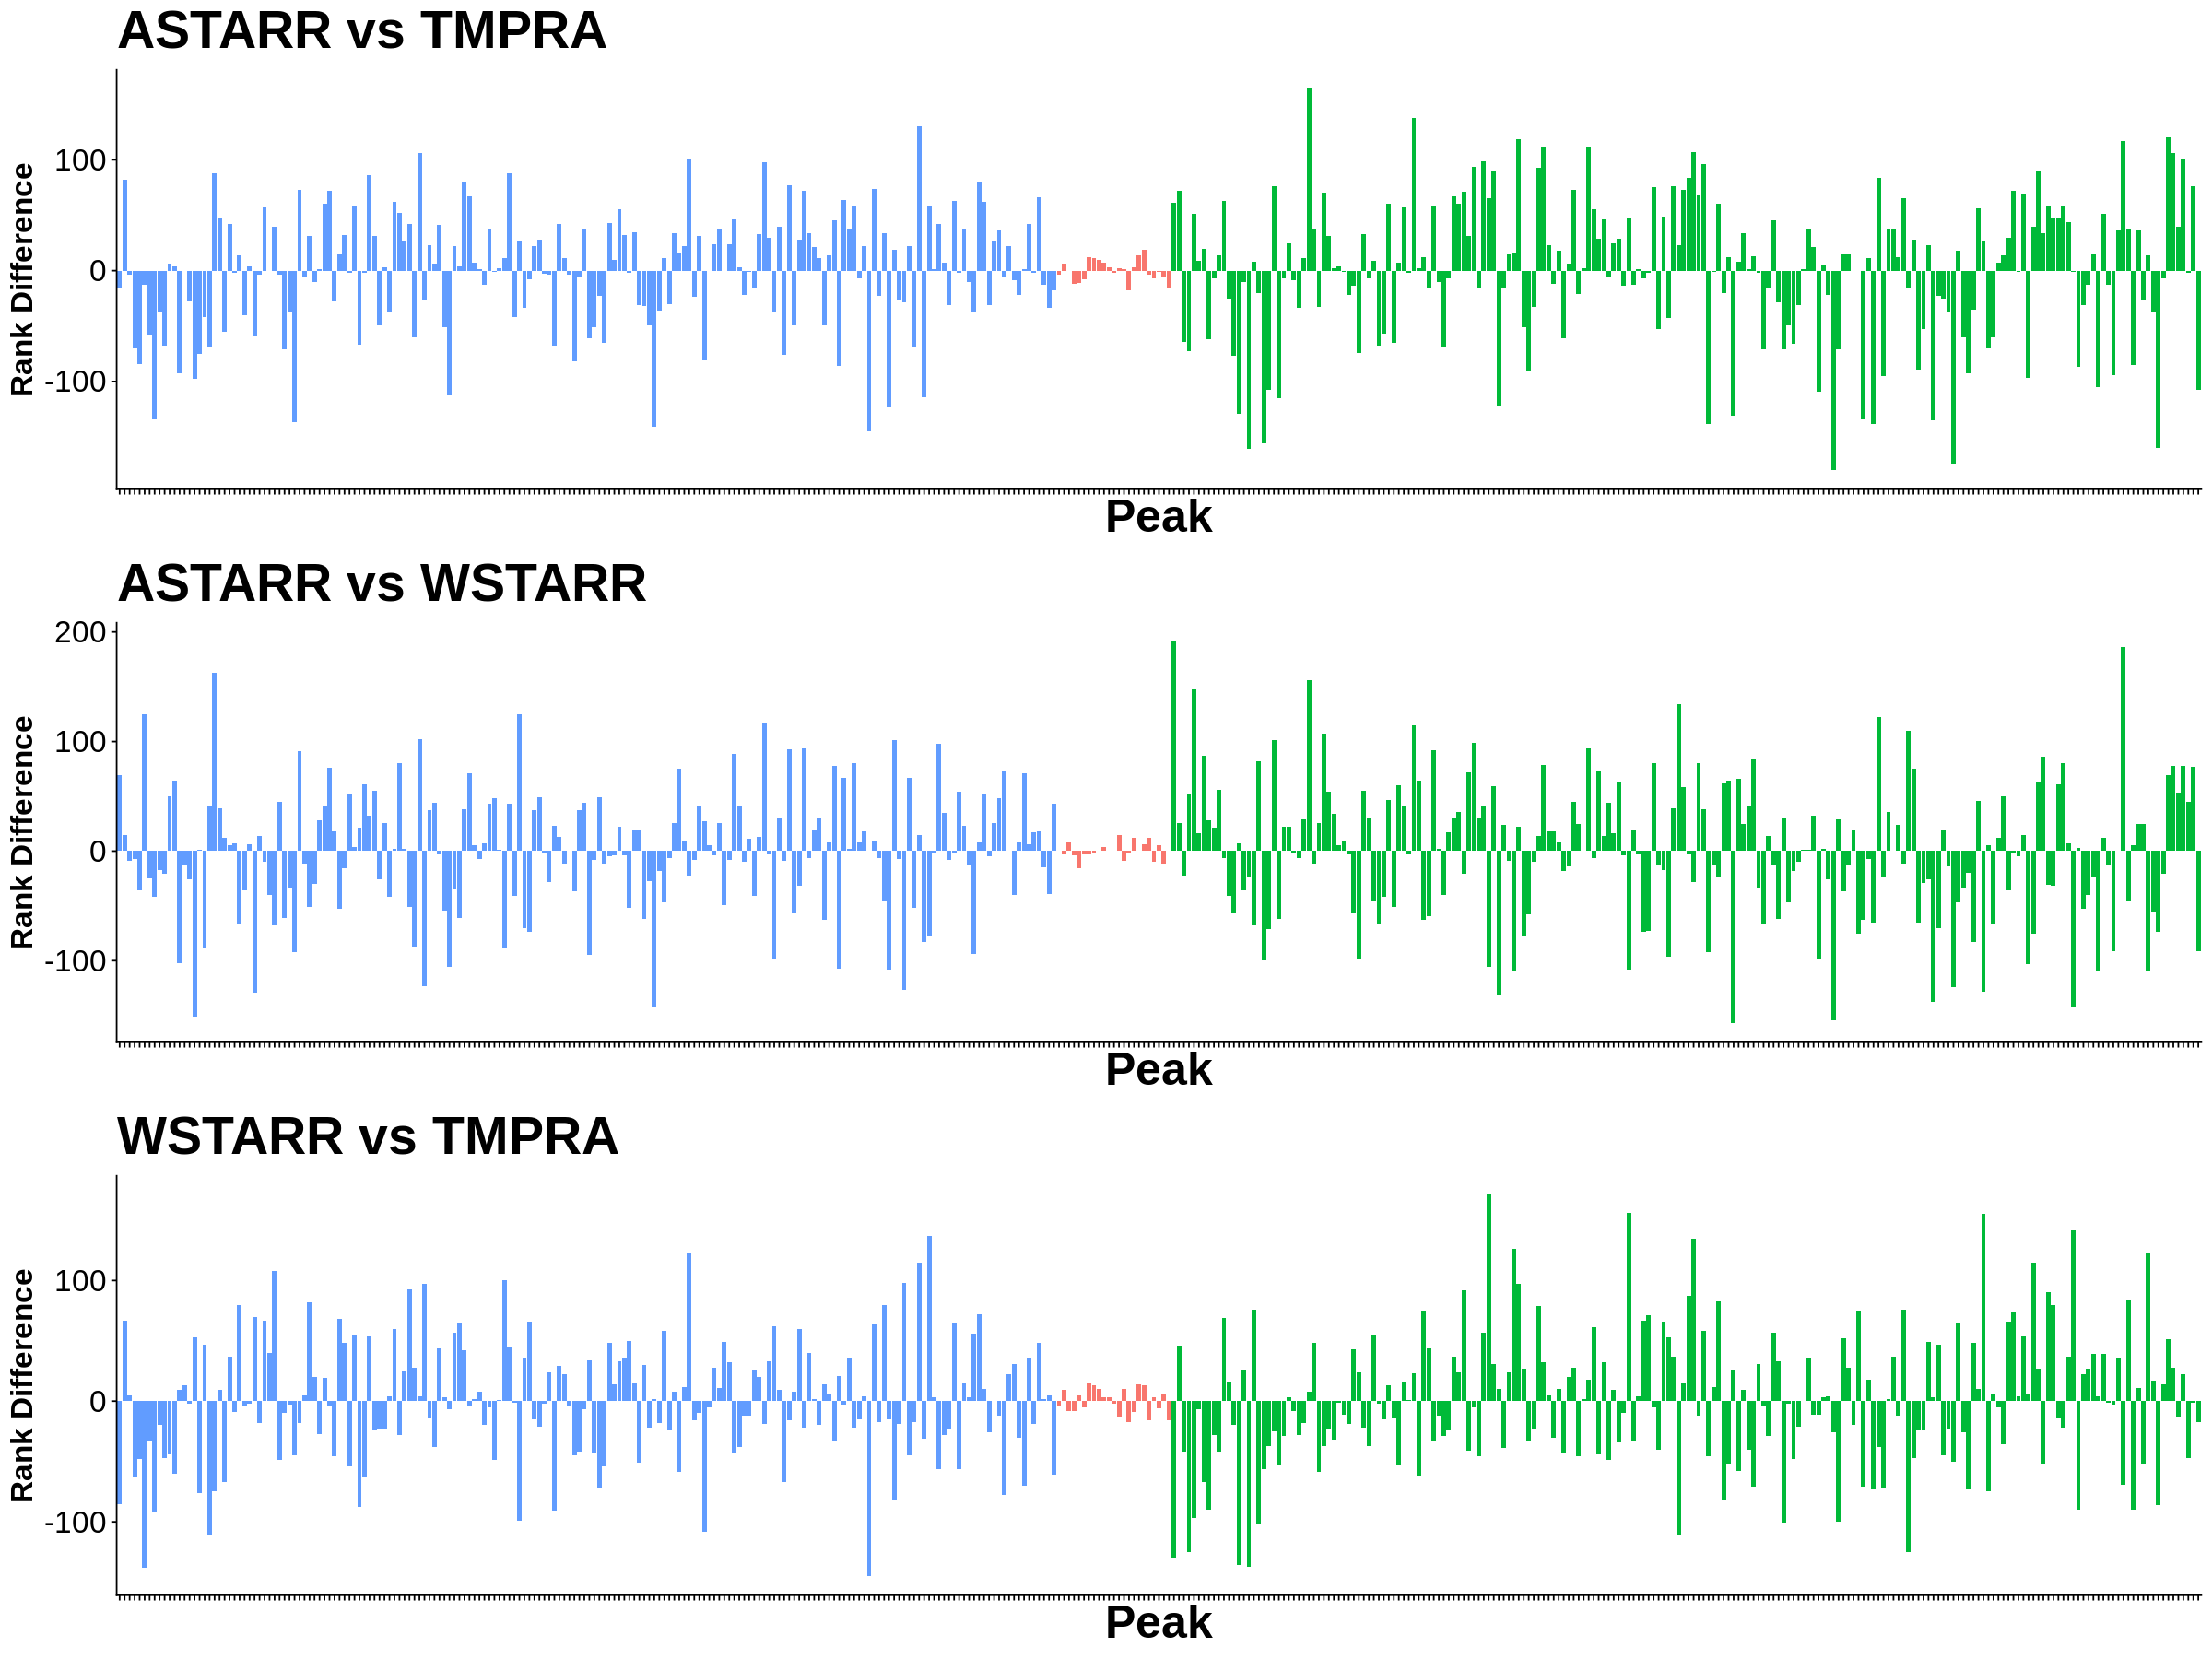

In [20]:
dat = dat_rank_diff 
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("rank_diff_")) %>%
    tidyr::gather(Assay, Rank_Diff, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'rank_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'rank_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'rank_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))
lst = split(dat, dat$Assay)

lst_gpt_rankdiff = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=Rank_Diff, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="Rank Difference") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_rankdiff, ncol=1, align = "v")

## Plot RankNorm difference

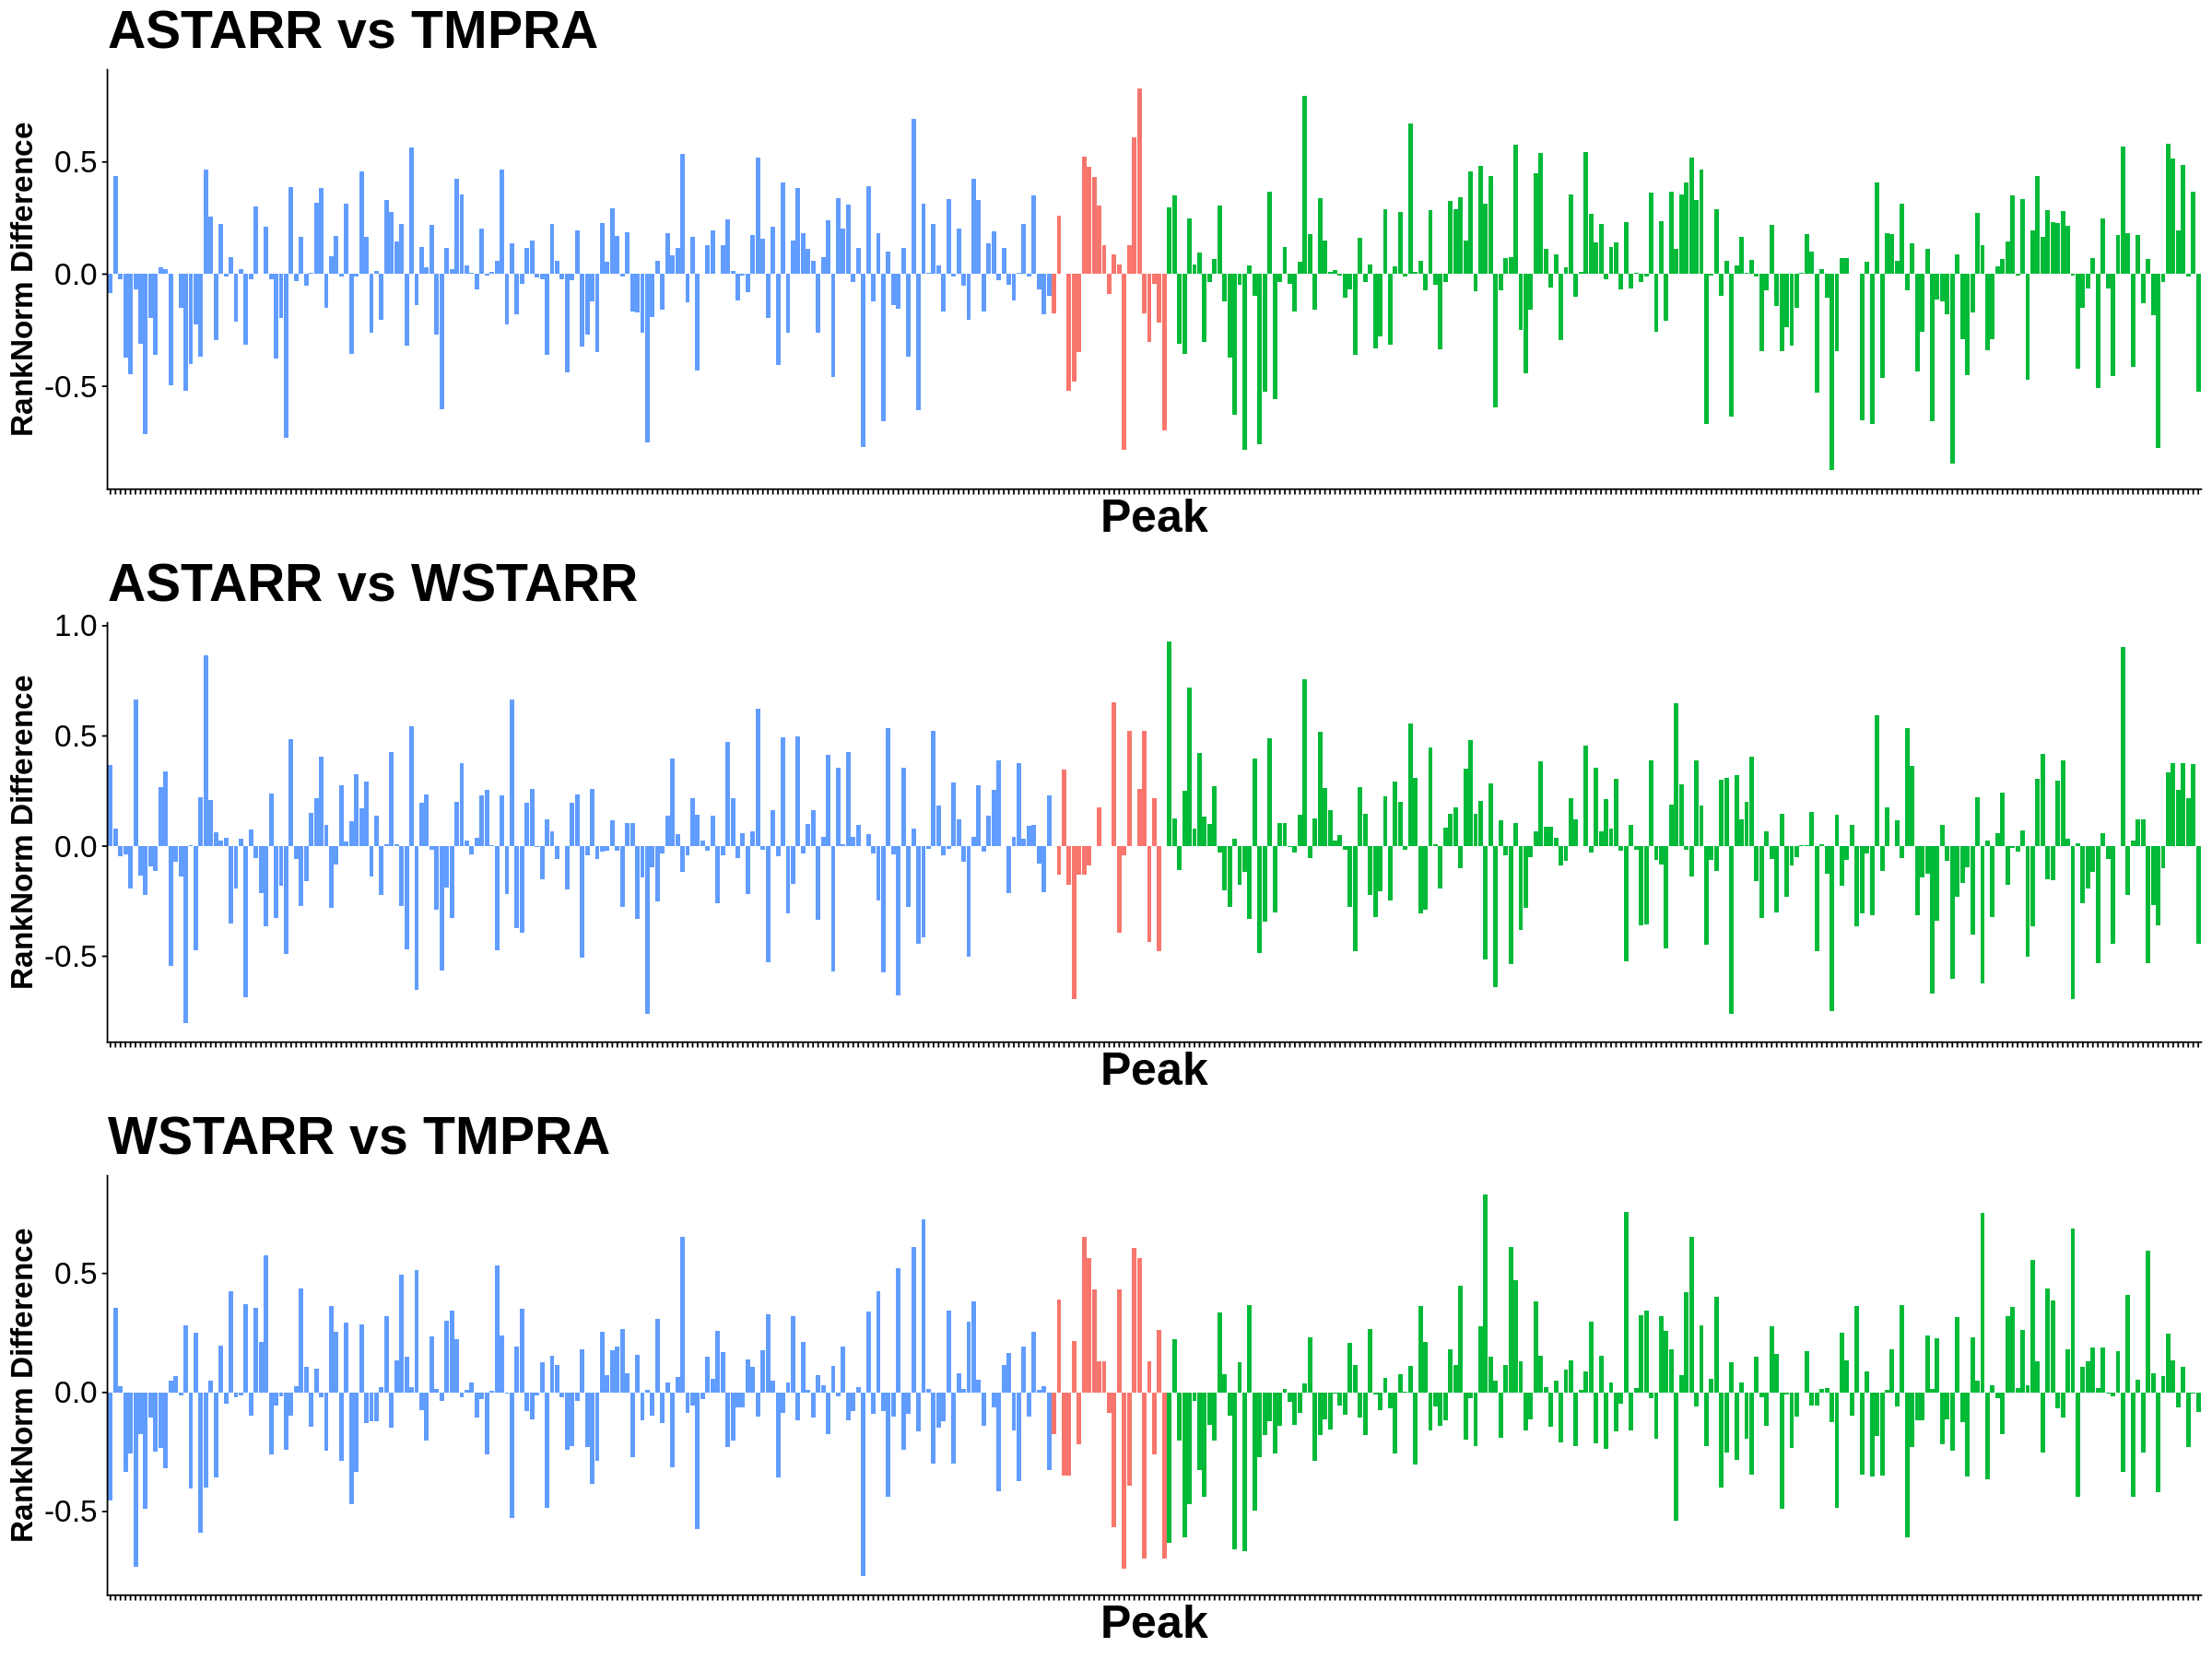

In [21]:
dat = dat_rank_diff 
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("ranknorm_diff_")) %>%
    tidyr::gather(Assay, Rank_Diff, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))
lst = split(dat, dat$Assay)

lst_gpt_rankdiff = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=Rank_Diff, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="RankNorm Difference") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_rankdiff, ncol=1, align = "v")

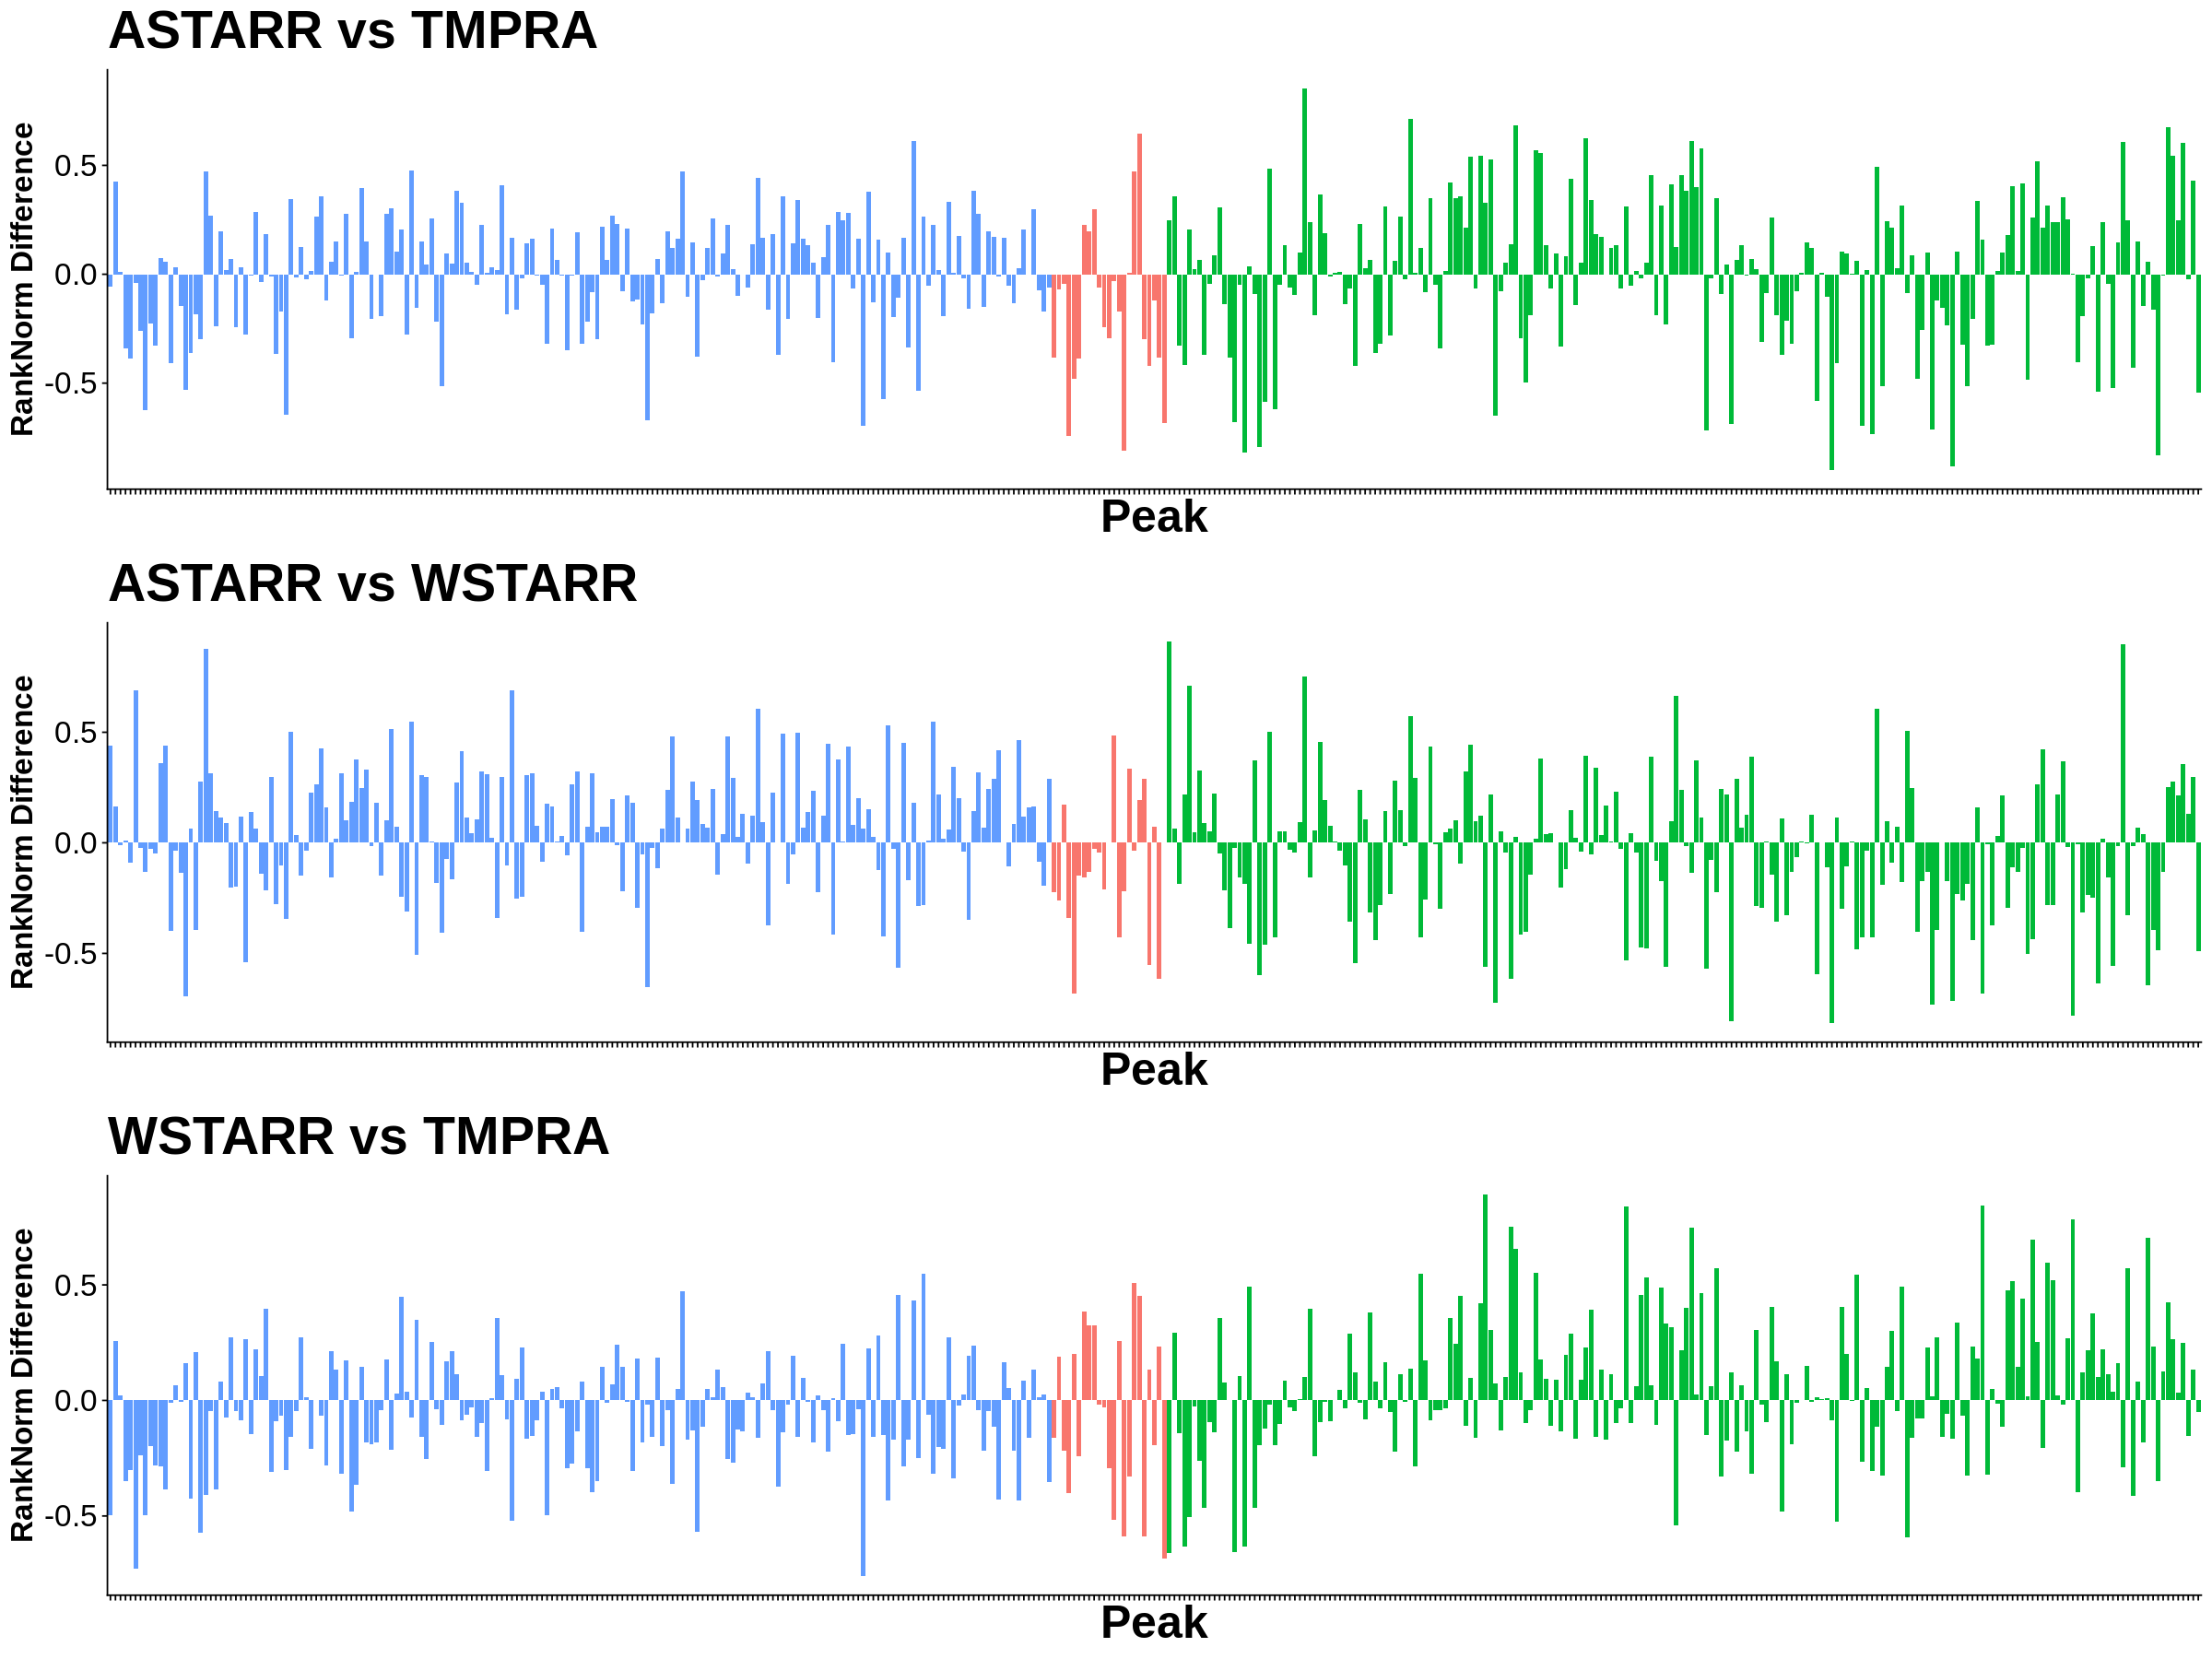

In [22]:
dat = dat_rank_diff_tot
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("ranknorm_diff_")) %>%
    tidyr::gather(Assay, Rank_Diff, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))
lst = split(dat, dat$Assay)

lst_gpt_rankdiff = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=Rank_Diff, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="RankNorm Difference") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_rankdiff, ncol=1, align = "v")

## Plot Standardized (Rank difference)

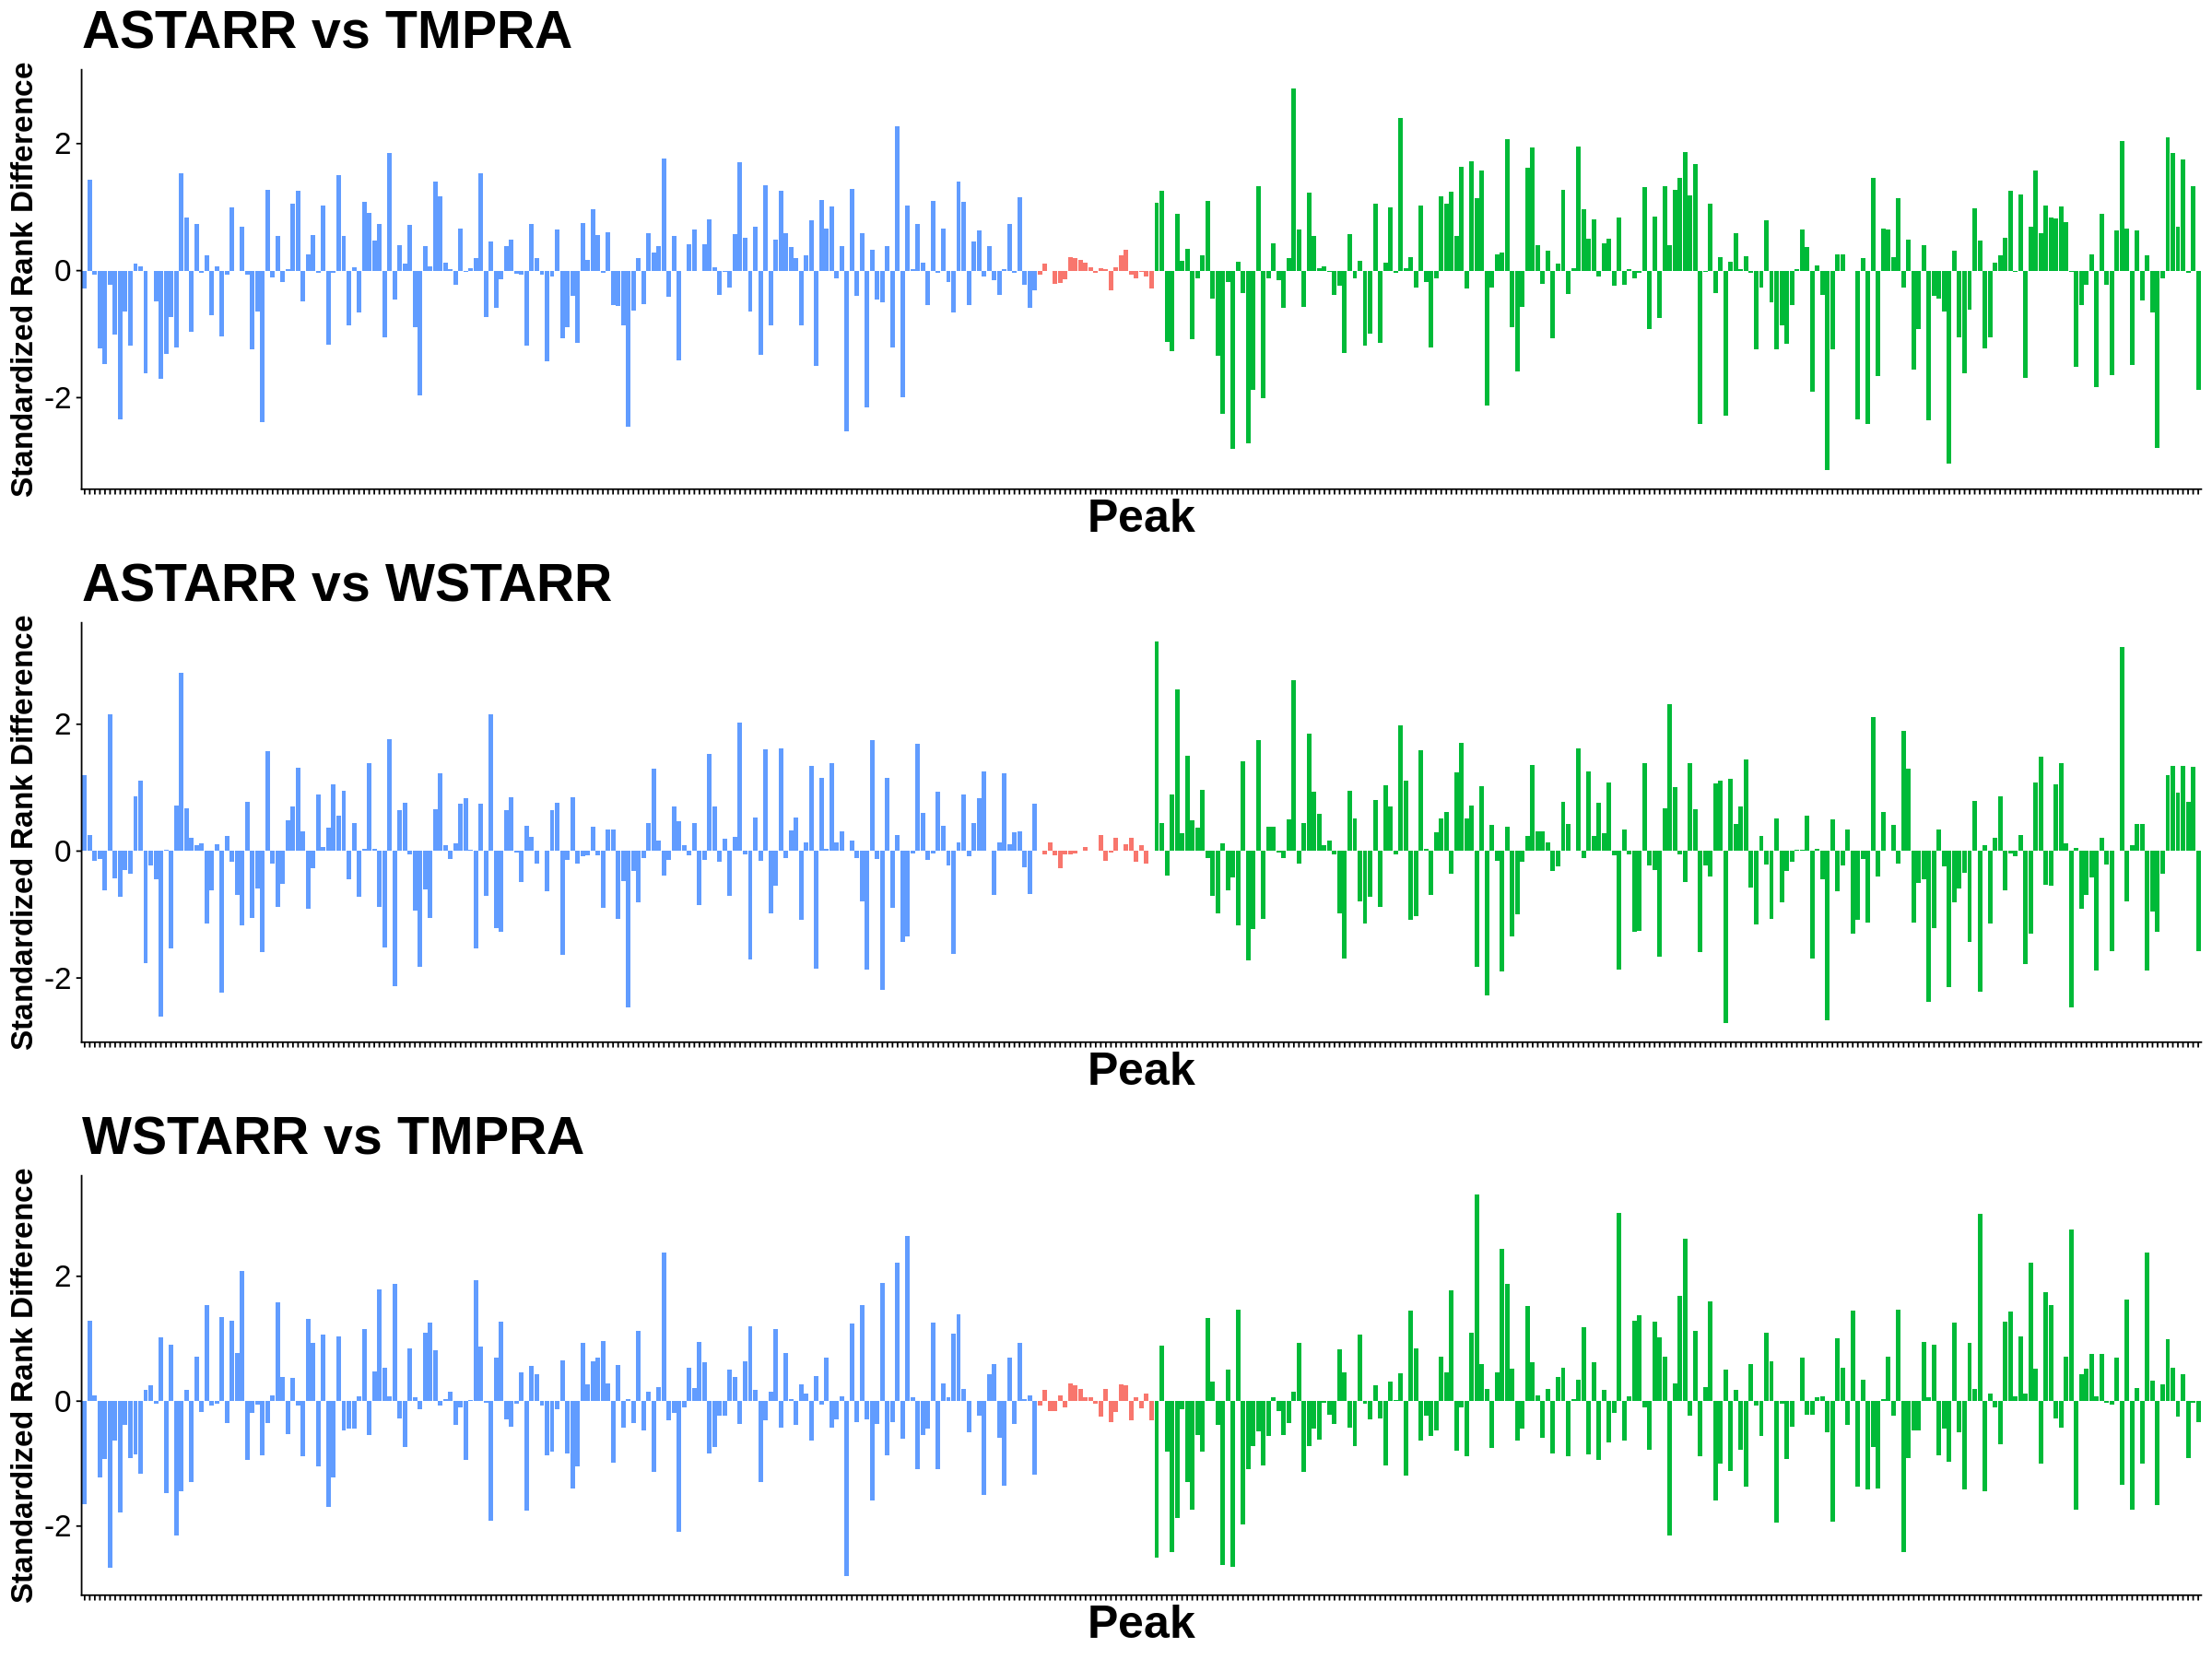

In [23]:
dat = dat_rank_diff 
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("z_rank_diff_")) %>%
    tidyr::gather(Assay, z_Rank_Diff, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_rank_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_rank_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_rank_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

lst = split(dat, dat$Assay)

lst_gpt_rankdiff = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=z_Rank_Diff, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="Standardized Rank Difference") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_rankdiff, ncol=1, align = "v")

In [24]:
dat = dat_rank_diff_tot
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("z_rank_diff_")) %>%
    tidyr::gather(Assay, z_Rank_Diff, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_rank_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_rank_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_rank_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

lst = split(dat, dat$Assay)

lst_gpt_rankdiff = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=z_Rank_Diff, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="Standardized Rank Difference") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_rankdiff, ncol=1, align = "v")

ERROR: [1m[33mError[39m in `dplyr::mutate()`:[22m
[1m[22m[33m![39m Problem while computing `Assay = recode(...)`.
[1mCaused by error in `recode()`:[22m
[33m![39m object 'Assay' not found


## Plot Standardized (RankNorm difference)

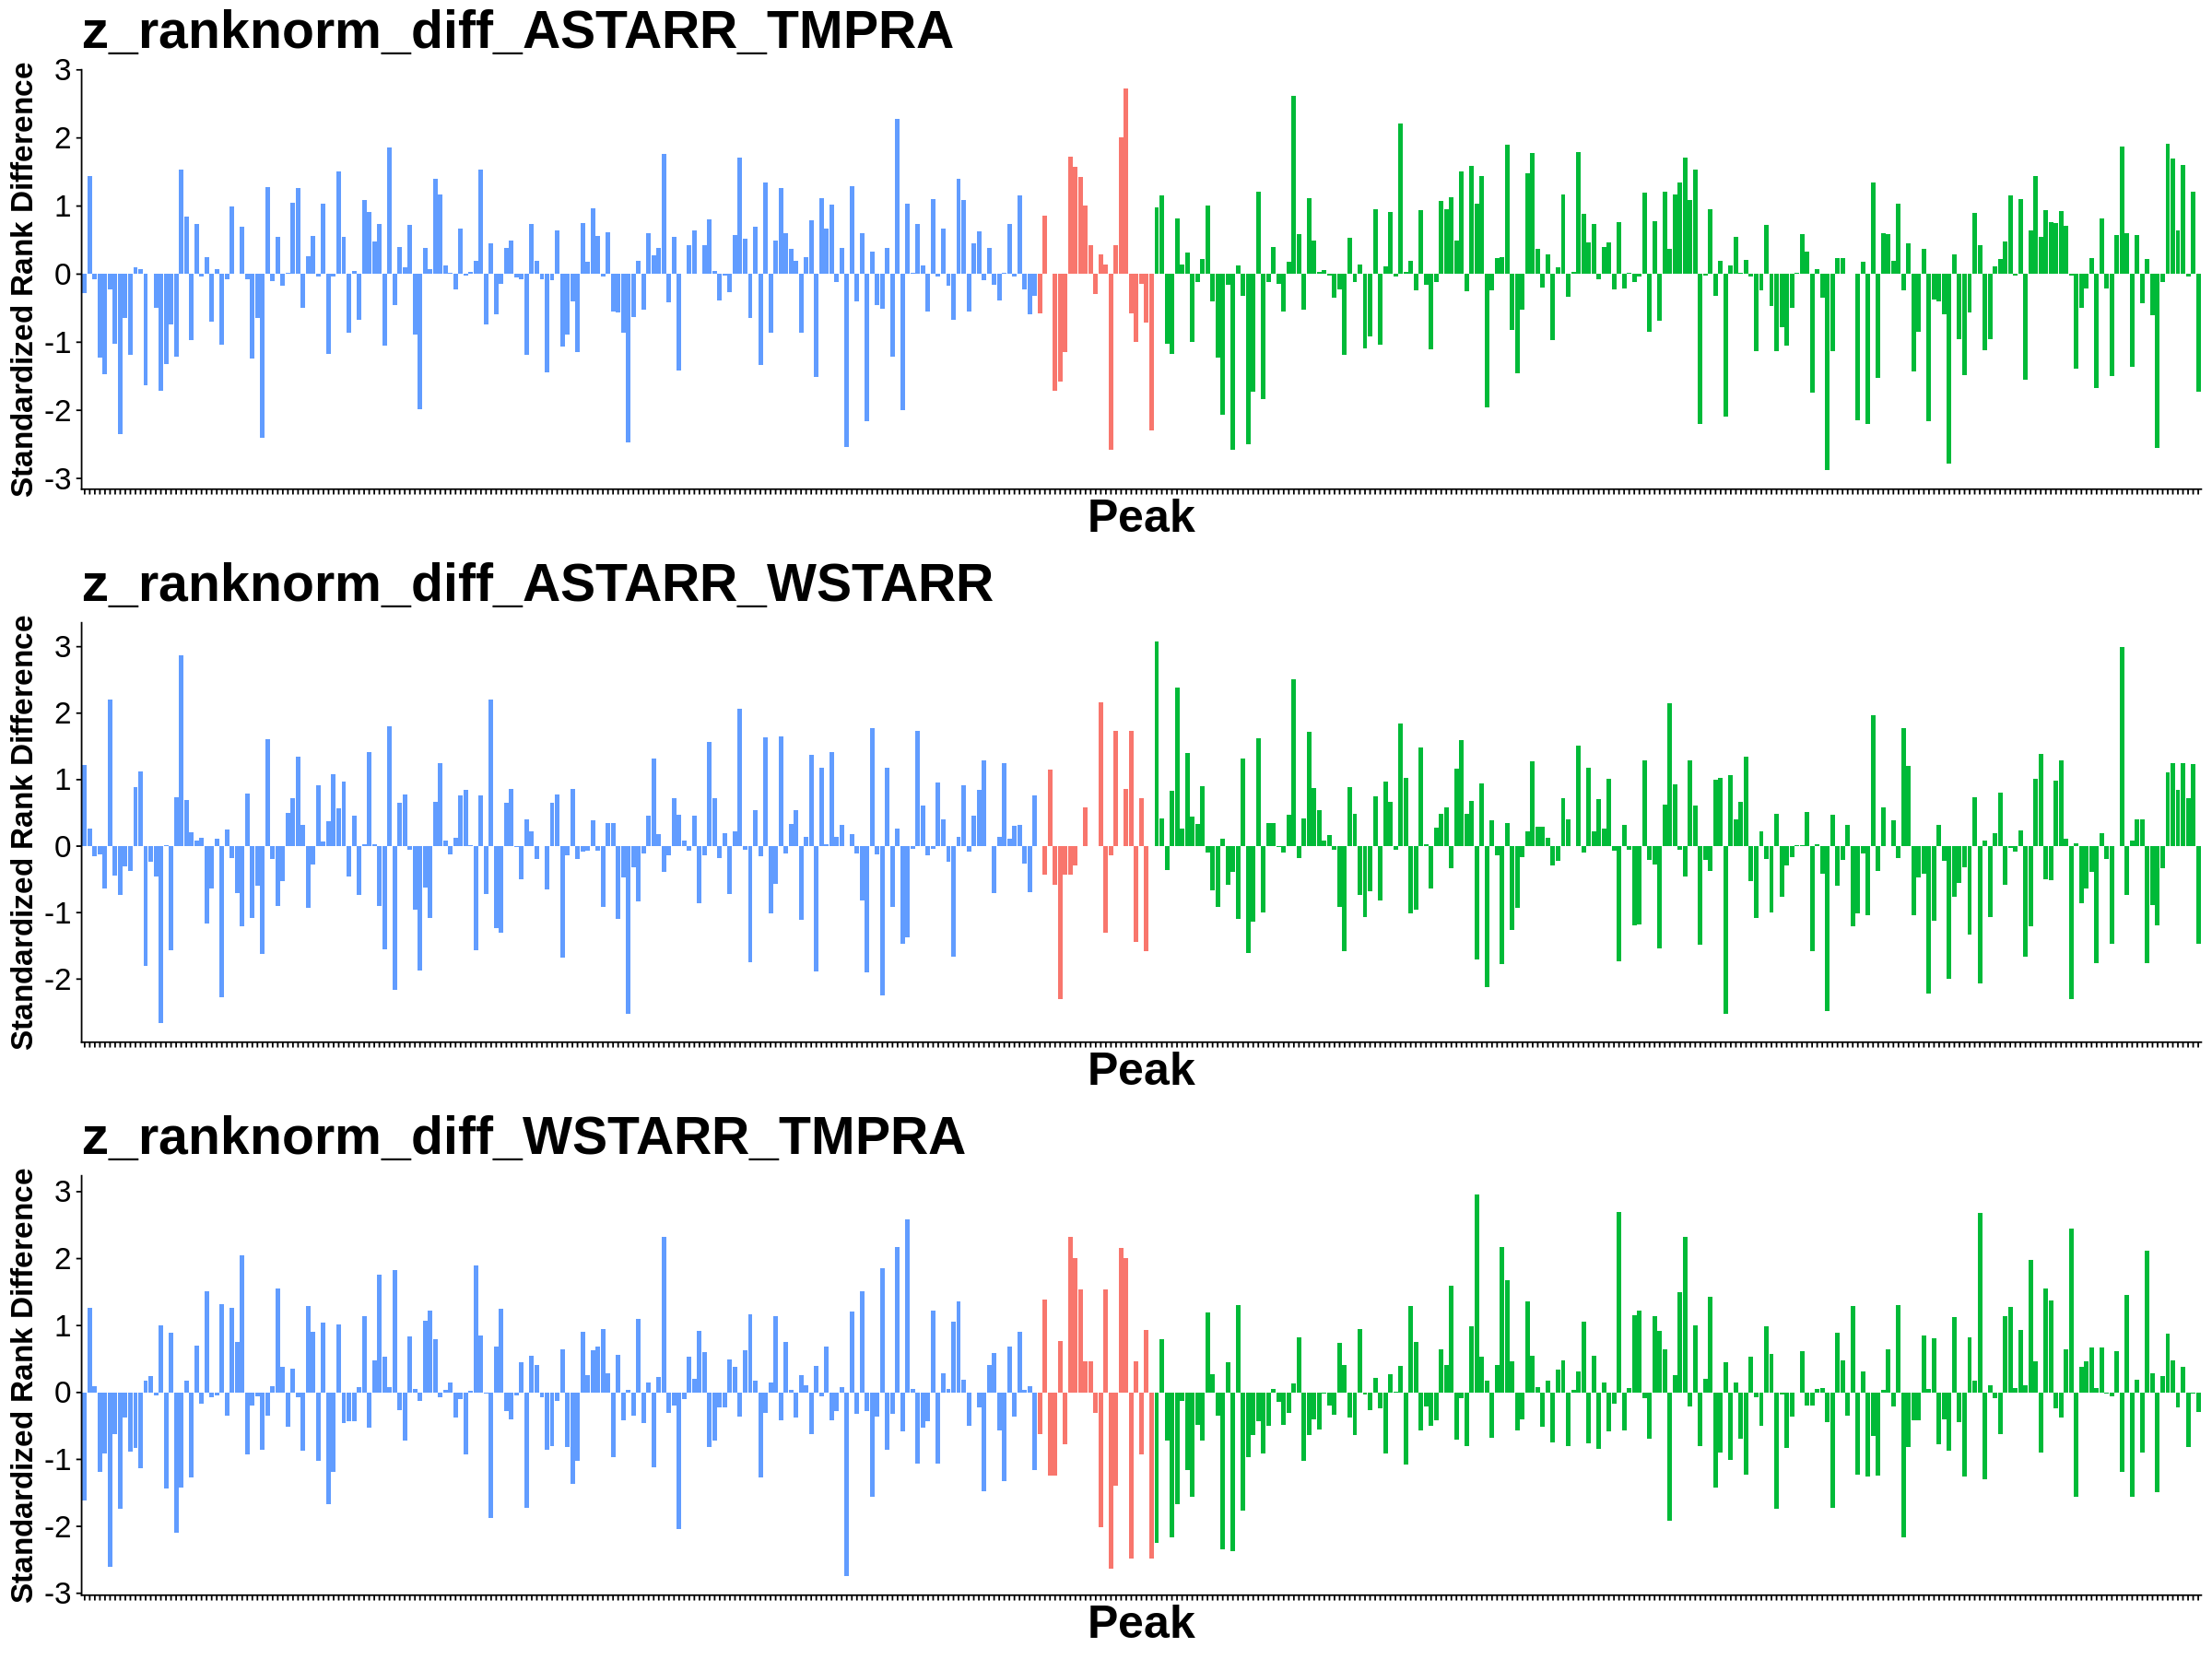

In [27]:
dat = dat_rank_diff
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, z_Rank_Diff, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_rank_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_rank_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_rank_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

lst = split(dat, dat$Assay)

lst_gpt_rankdiff = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=z_Rank_Diff, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="Standardized Rank Difference") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_rankdiff, ncol=1, align = "v")

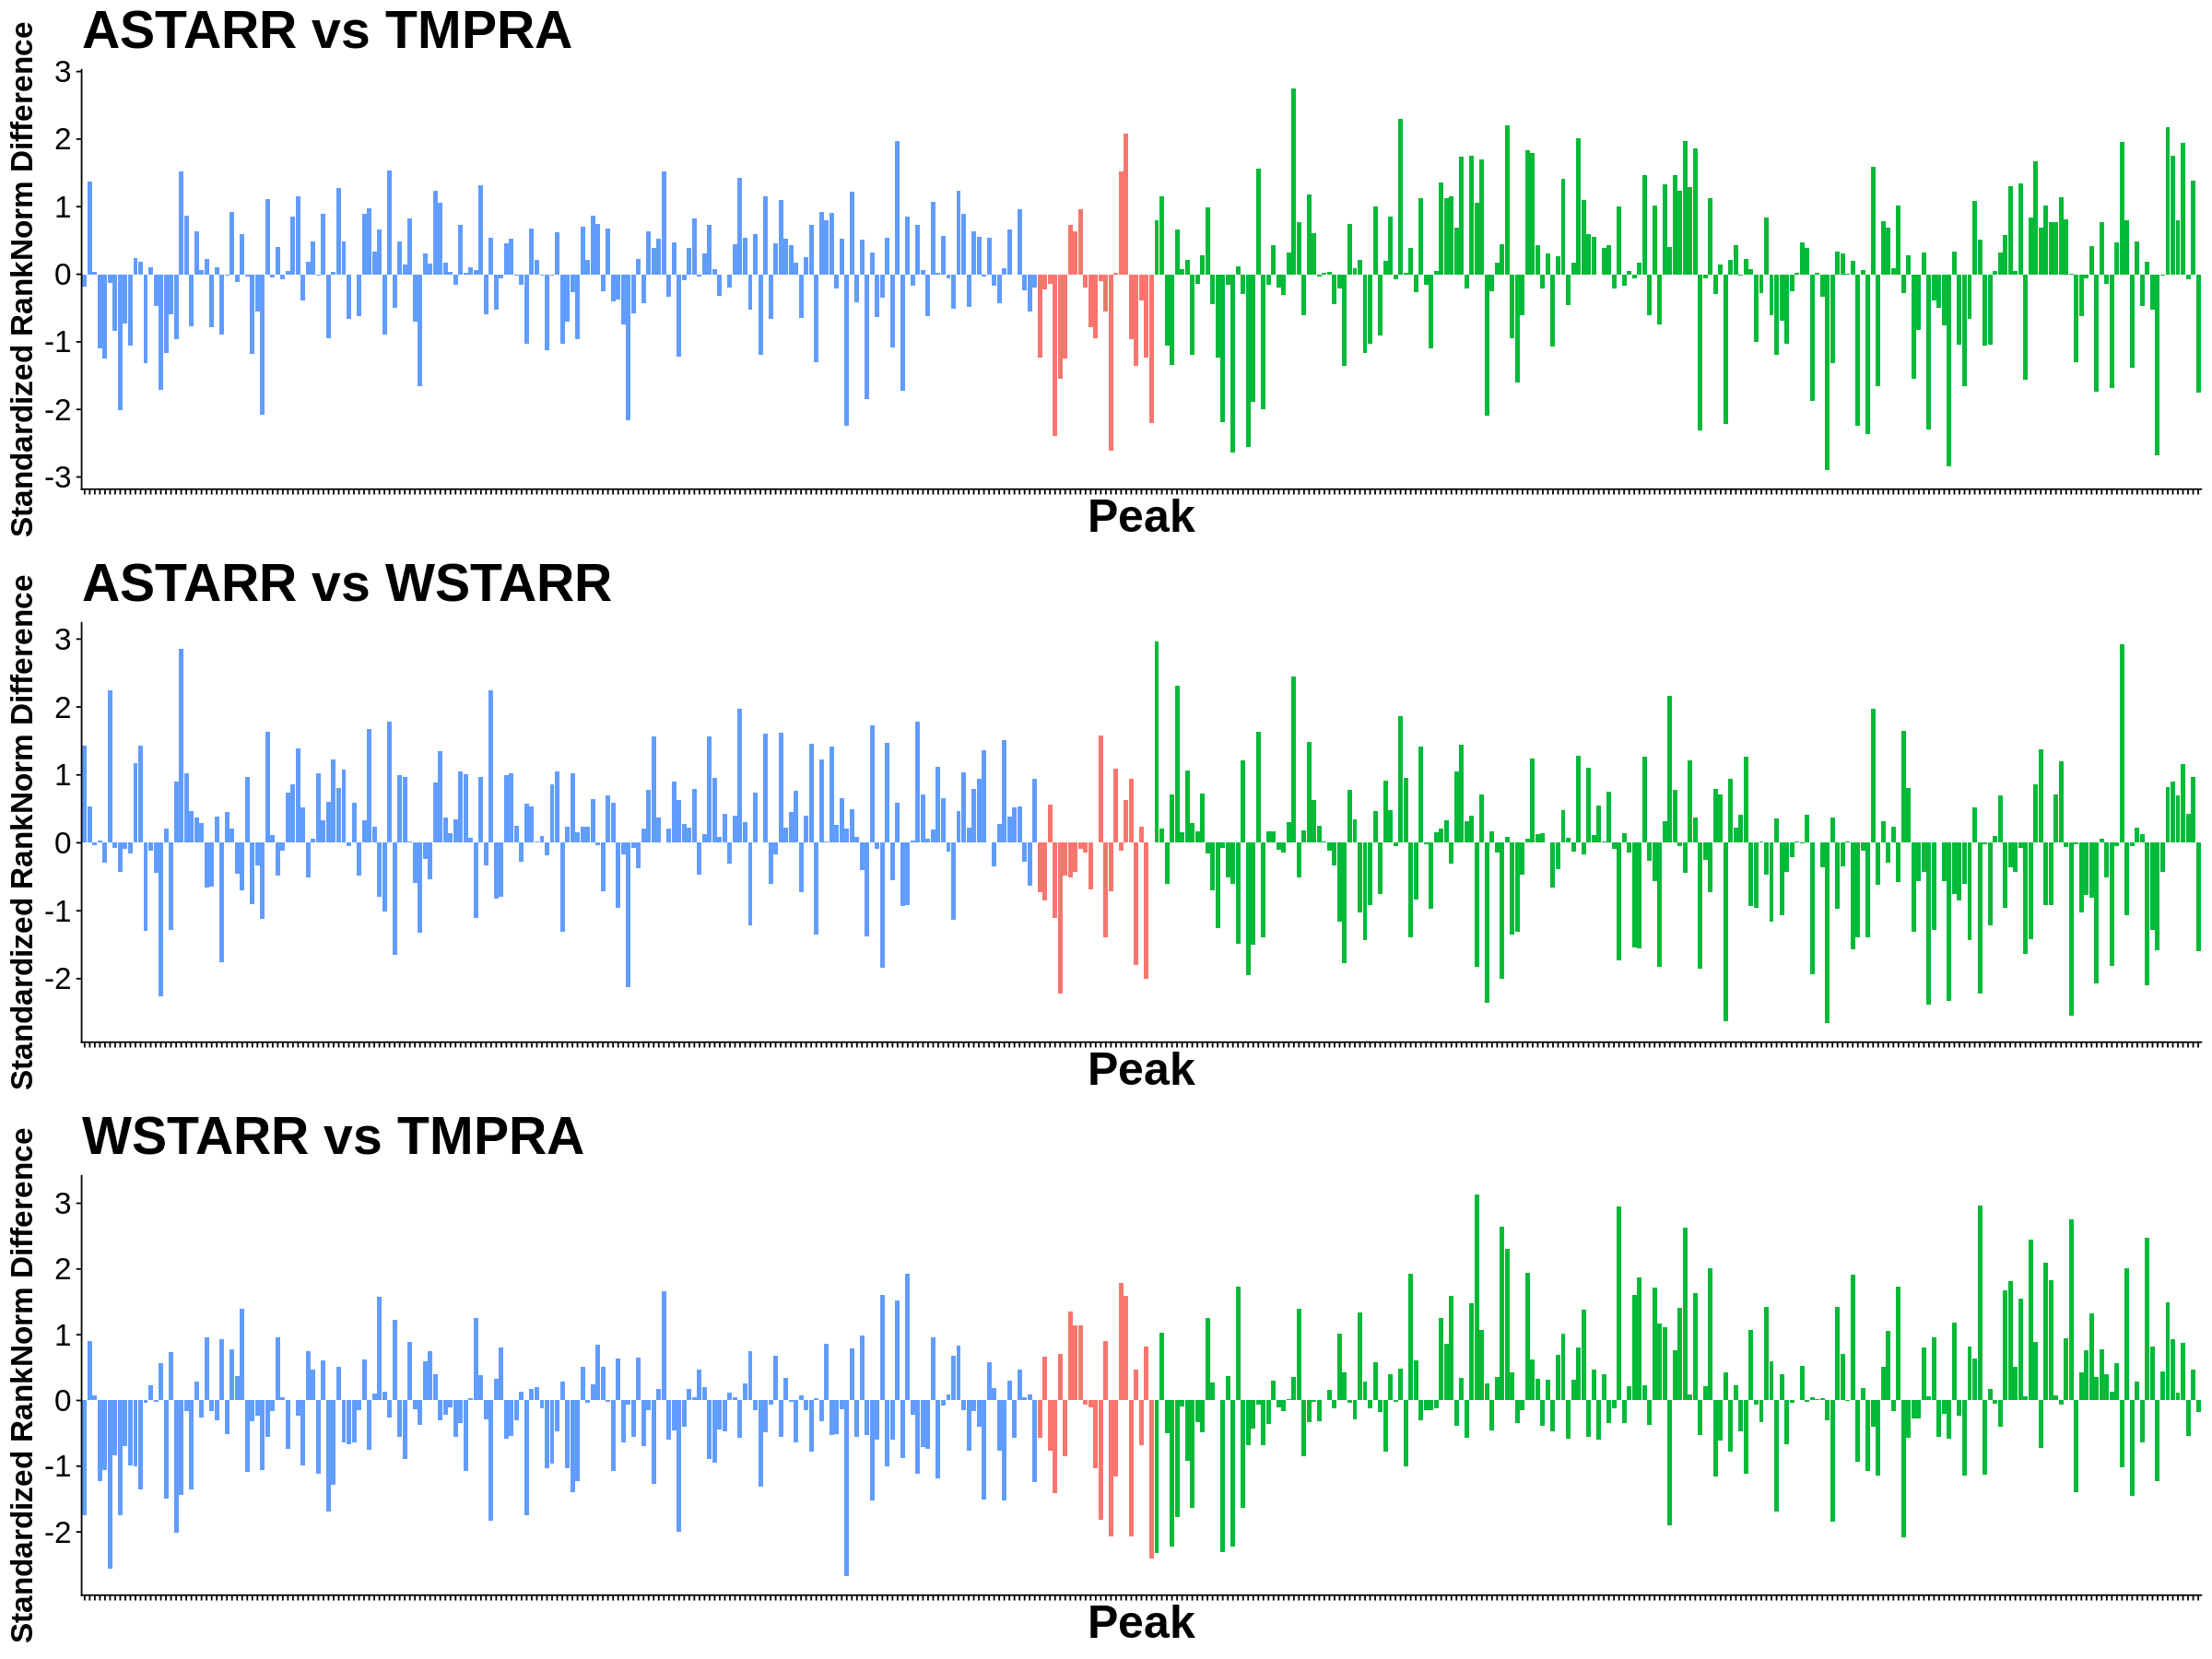

In [25]:
dat = dat_rank_diff_tot
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, z_Rank_Diff, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

lst = split(dat, dat$Assay)

lst_gpt_rankdiff = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=z_Rank_Diff, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="Standardized RankNorm Difference") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_rankdiff, ncol=1, align = "v")

## Presentation: sort by difference

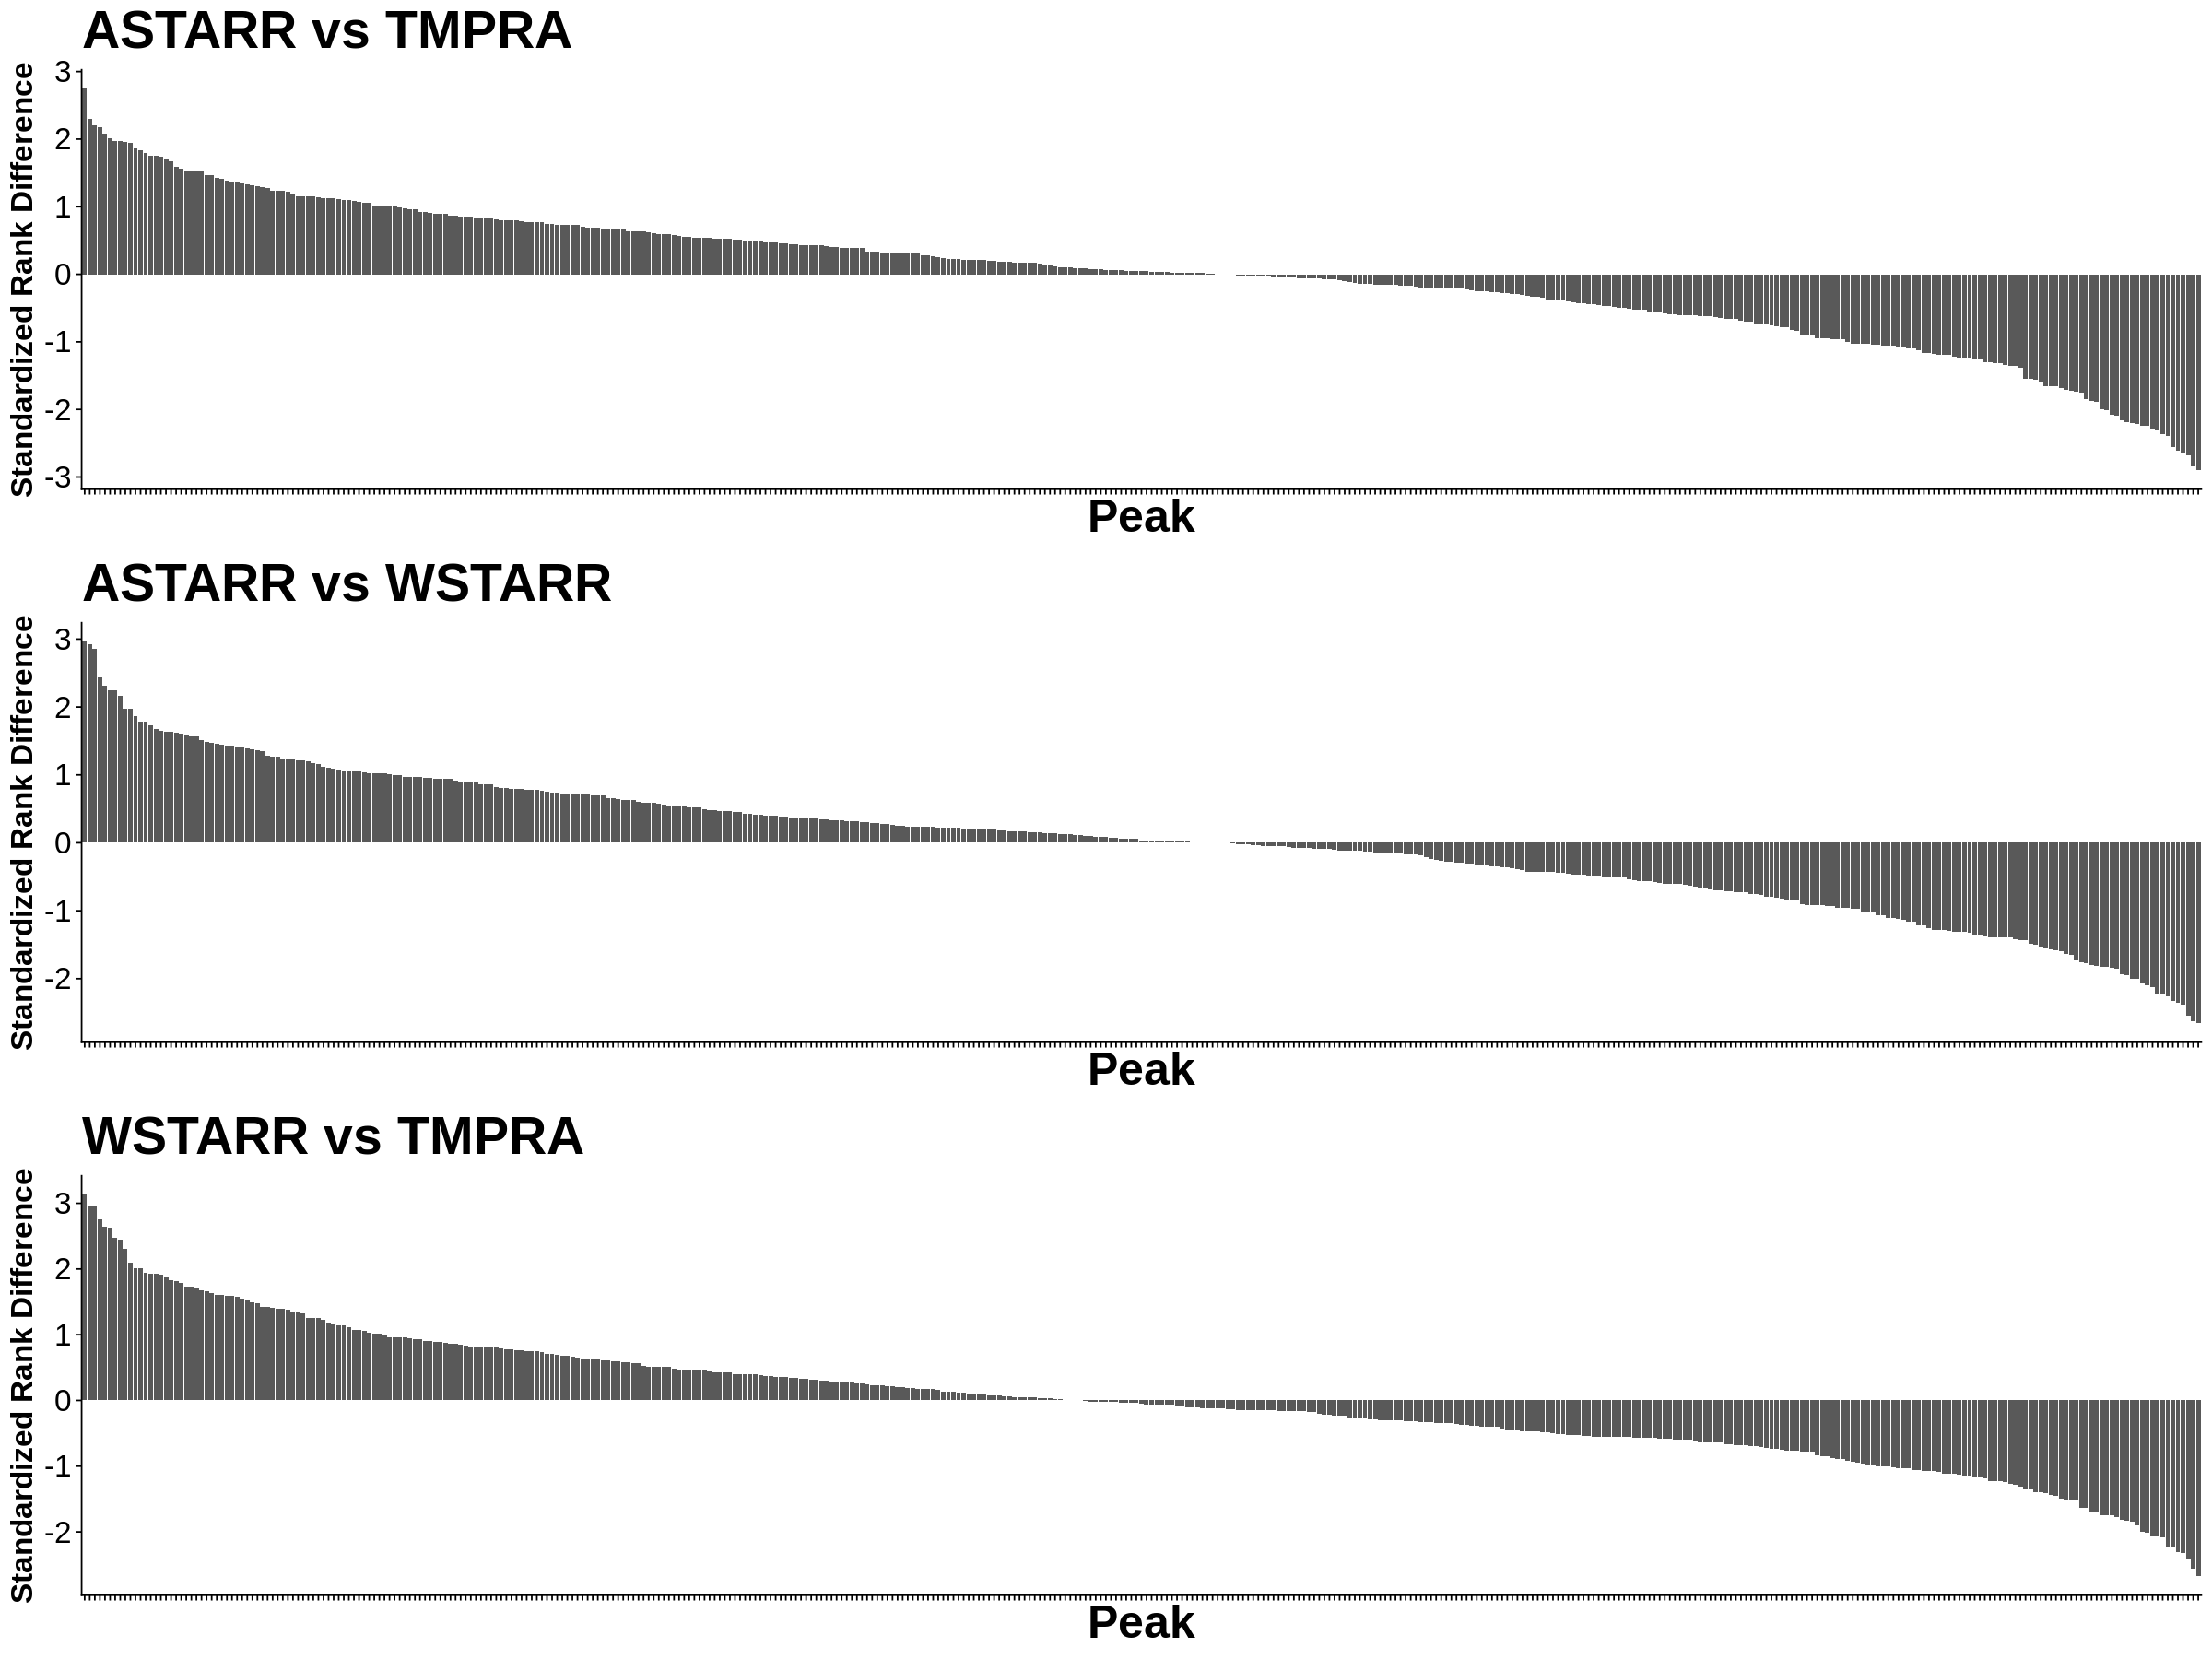

In [23]:
dat = dat_rank_diff_tot
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

lst = split(dat, dat$Assay)

lst_gpt_rankdiff = lapply(lst, function(dat){
    ###
    dat = dat %>% arrange(-Value)
    dat$Peak = factor(dat$Peak, levels=dat$Peak)
    
    ###
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=Value)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="Standardized Rank Difference") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_rankdiff, ncol=1, align = "v")

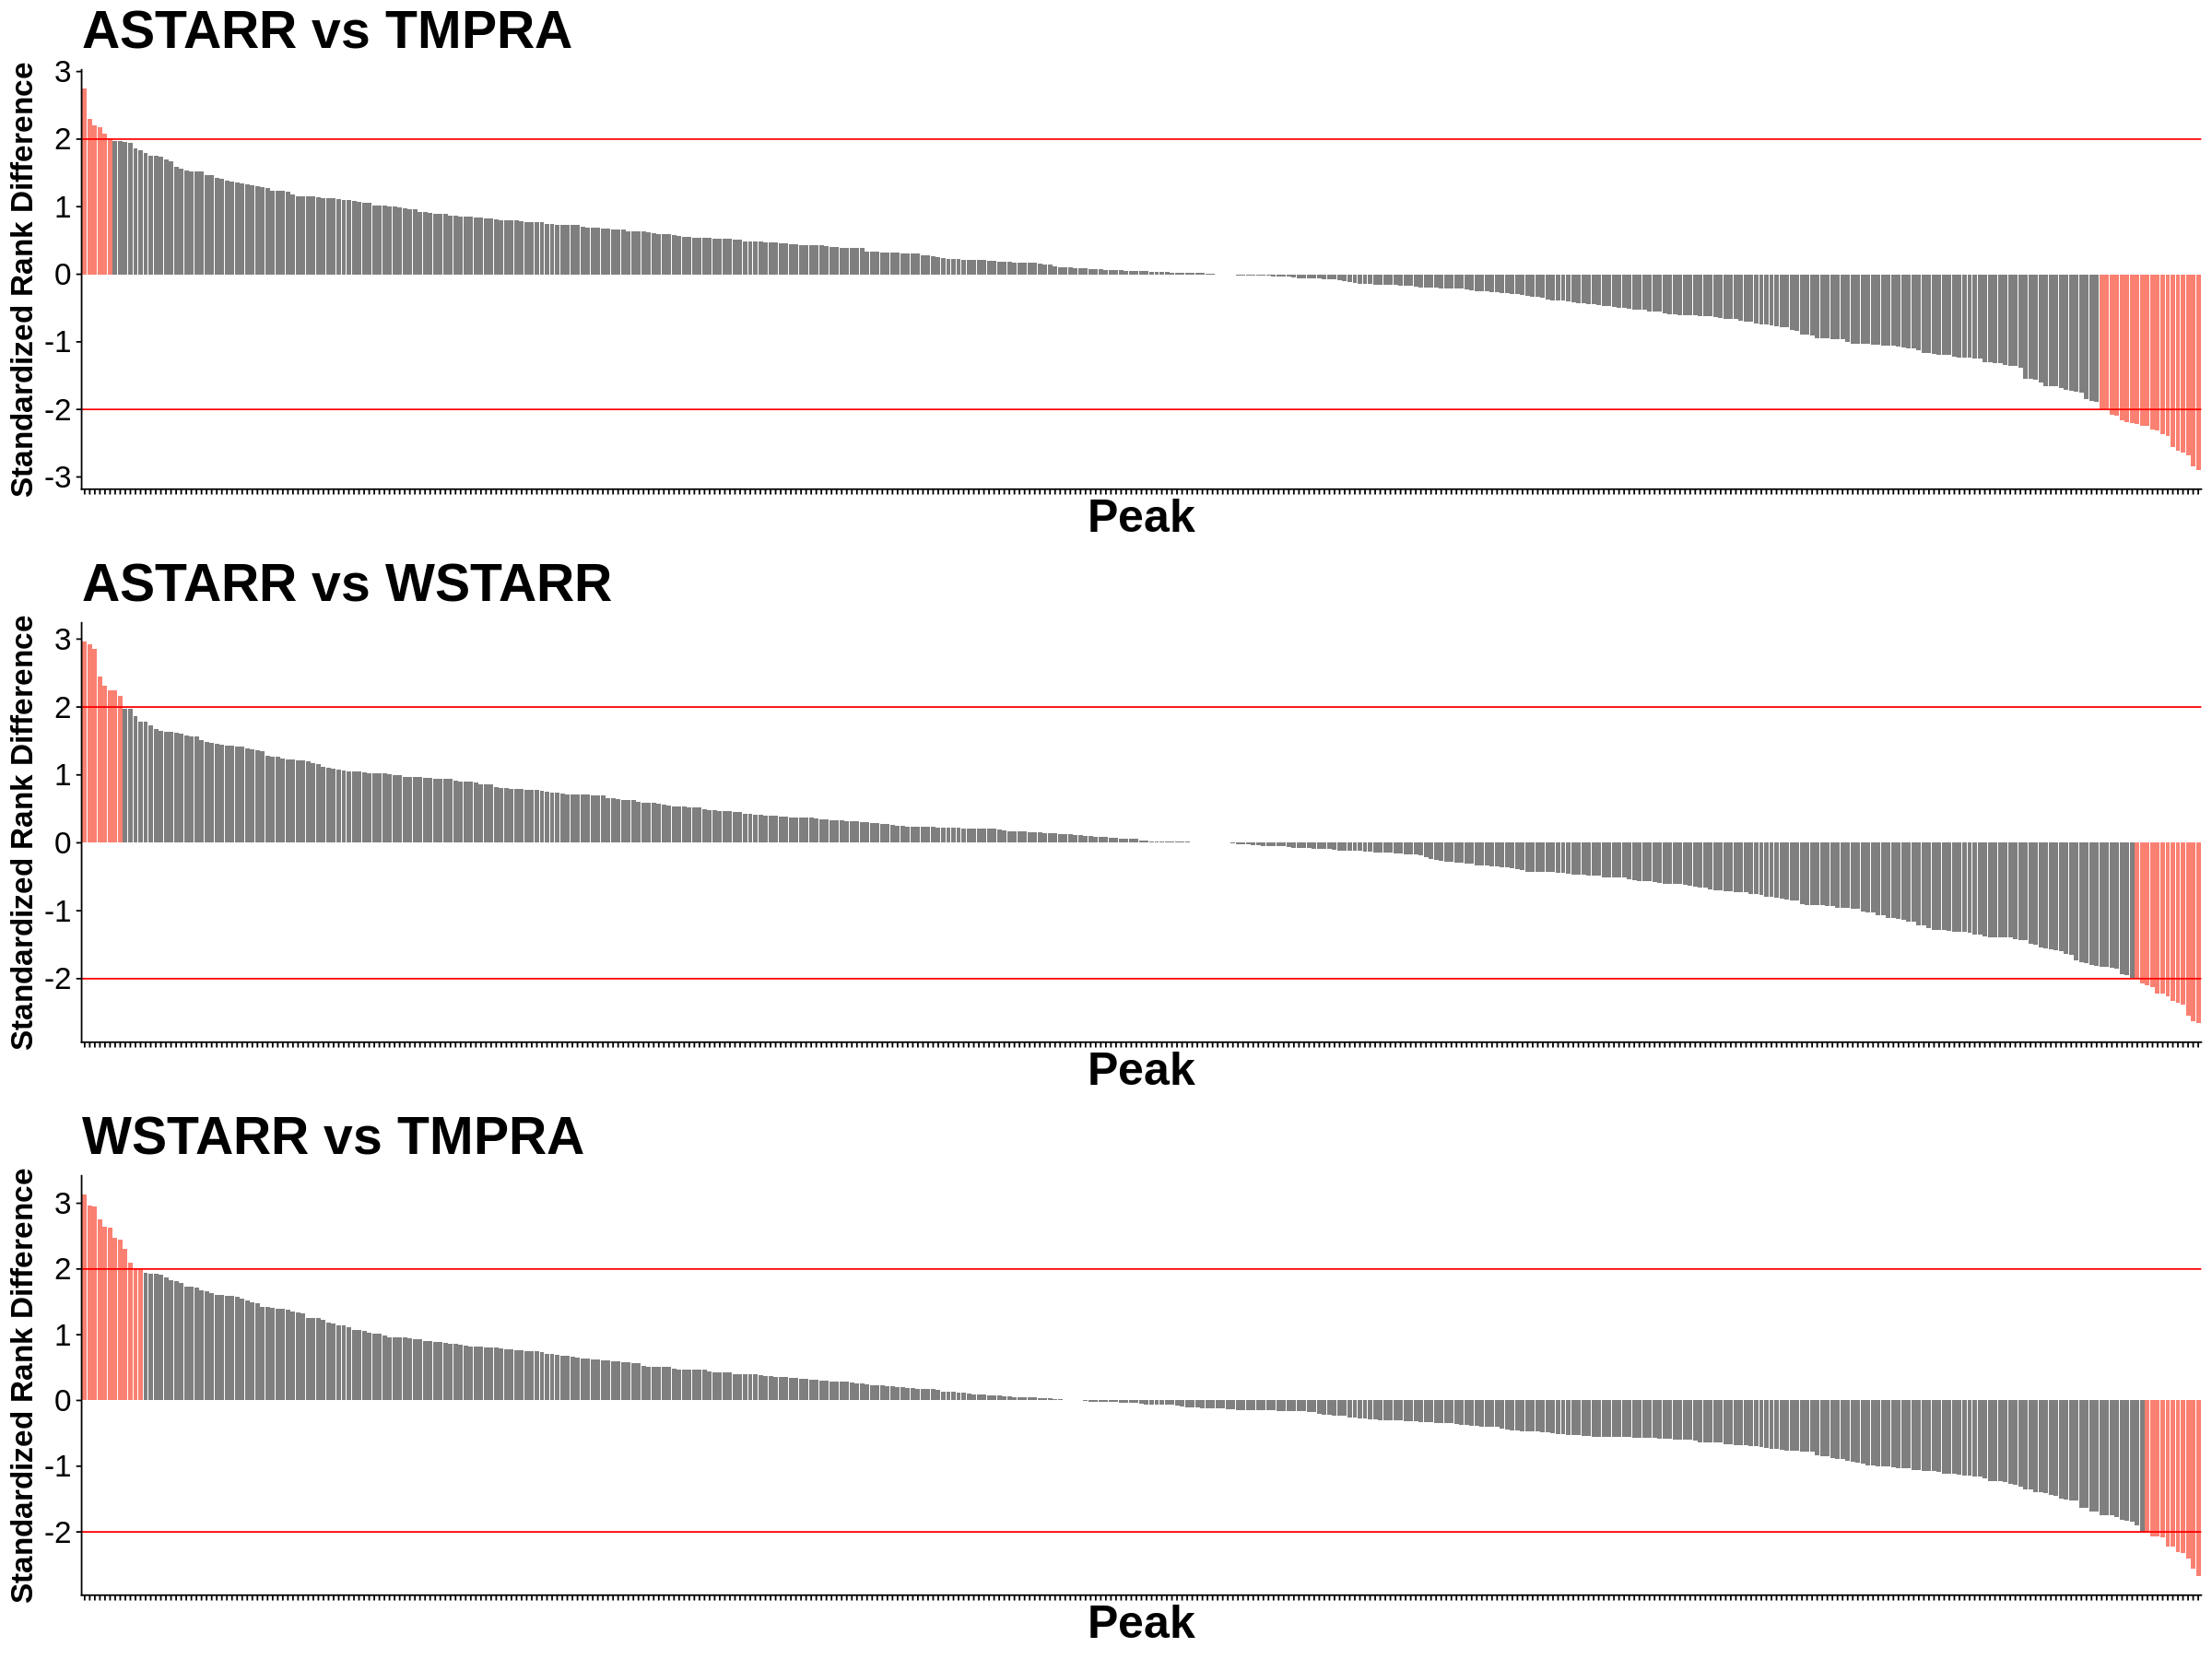

In [43]:
dat = dat_rank_diff_tot
dat = dat %>% 
    dplyr::select(Peak, Region, starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    )) %>%
    dplyr::mutate(Color = ifelse(abs(Value) > 2, "salmon", "grey50"))

lst = split(dat, dat$Assay)

lst_gpt_rankdiff = lapply(lst, function(dat){
    ###
    dat = dat %>% arrange(-Value)
    dat$Peak = factor(dat$Peak, levels=dat$Peak)
    
    ###
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=Value)) + 
        geom_bar(stat = "identity", fill=dat$Color) +
        geom_hline(yintercept = c(-2, 2), color="red") +
        labs(title=txt, y="Standardized Rank Difference") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_rankdiff, ncol=1, align = "v")

In [28]:
dat = dat_rank_diff_tot
dat = dat %>% 
    dplyr::select(Peak, starts_with("z_ranknorm_diff_")) %>%
    tidyr::gather(Assay, Value, -Peak) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_ranknorm_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_ranknorm_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_ranknorm_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

dat = dat %>% 
    tidyr::spread(Peak, Value) %>%
    column_to_rownames("Assay") %>% 
    as.matrix

head(dat)

,chr11_61554569_61556228,chr11_61560645_61561556,chr11_61567108_61567997,chr11_61580592_61581826,chr11_61587170_61588742,chr11_61594868_61596571,chr11_61599147_61599901,chr11_61601718_61602065,chr11_61602703_61603919,chr11_61610154_61611940,⋯,chrX_49754378_49754670,chrX_49828982_49829610,chrX_49836520_49837095,chrX_49838489_49838861,chrX_49840468_49841285,chrX_49856806_49857279,chrX_49860981_49861475,chrX_49862119_49862823,chrX_49868244_49869175,chrX_49878402_49880117
ASTARR vs TMPRA,-1.2366712,-0.2241466,-0.1468547,-2.388321,-1.5535681,-1.2521295,0.7265443,0.6337940,0.9584201,-0.19322987,⋯,-0.5255852,-2.682031,-0.01545839,2.1796329,1.7467980,0.7961071,1.947757,-0.07729195,1.3835259,-1.7467980
ASTARR vs WSTARR,-0.7261479,-0.8432685,0.5621790,-1.100934,-2.2252918,-0.4840986,-0.5153307,-0.4216342,-0.0936965,-0.14054475,⋯,-1.2883268,-1.577224,-0.42163424,0.8198444,0.8979248,0.6949157,1.155590,0.42163424,0.9681971,-1.6006485
WSTARR vs TMPRA,-0.5649234,0.6661037,-0.7672840,-1.416524,0.7082622,-0.8431693,1.3490708,1.1467102,1.1467102,-0.05902185,⋯,0.8178742,-1.222595,0.43844802,1.4924096,0.9359179,0.1180437,0.876896,-0.53962833,0.4637431,-0.1770655


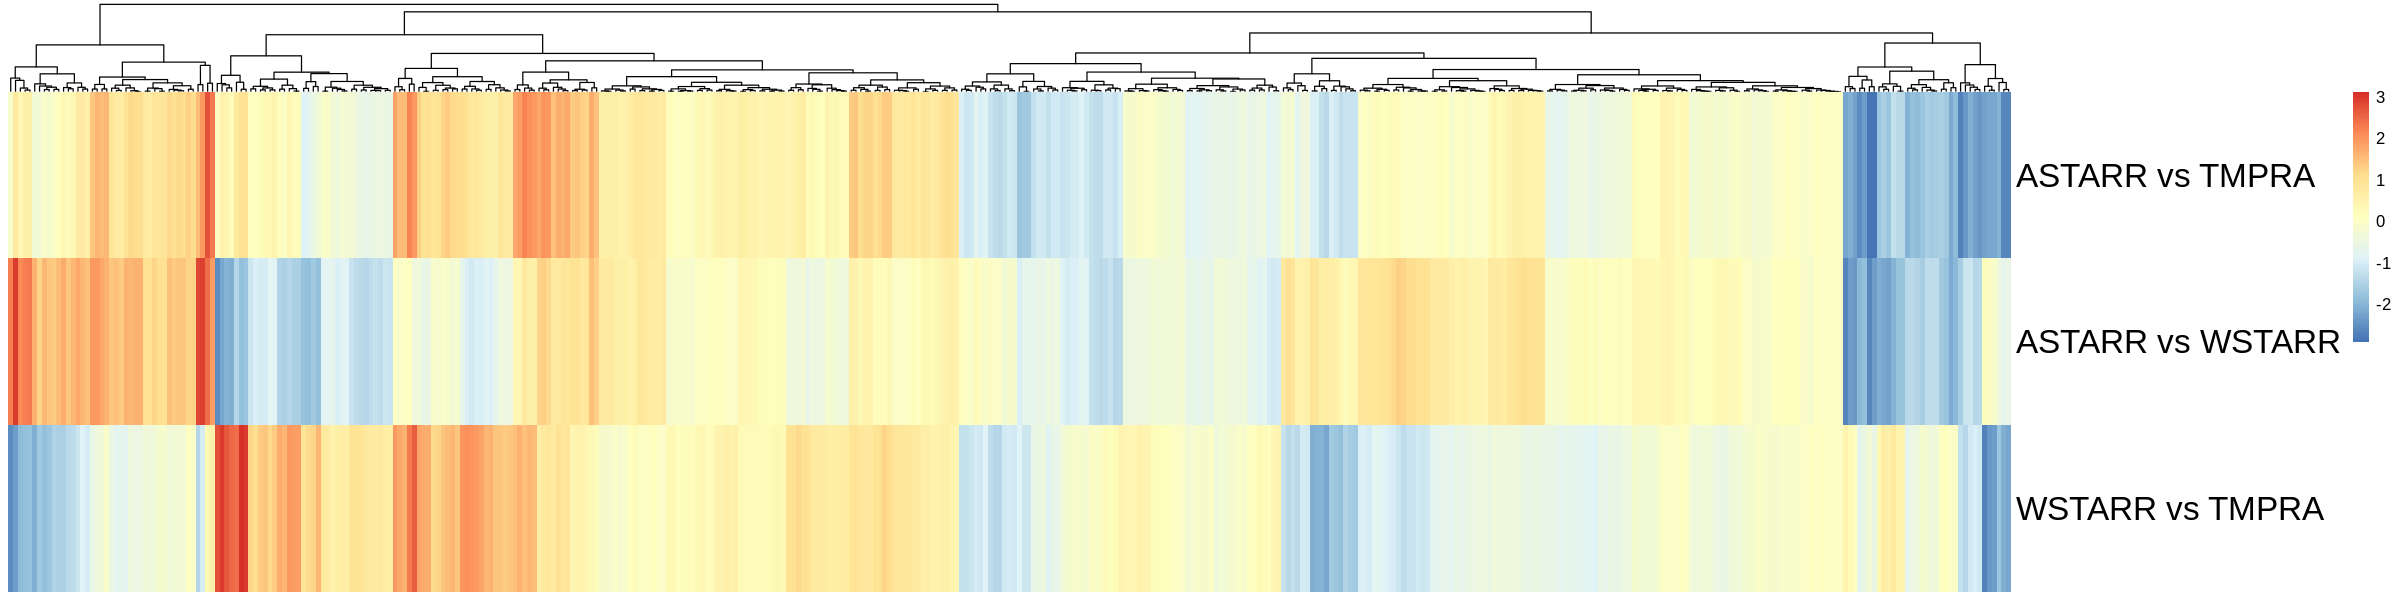

In [34]:
options(repr.plot.height=5, repr.plot.width=20)
pheatmap(dat, cluster_rows=FALSE, show_colnames = FALSE, fontsize_row=20, treeheight_row = 40)

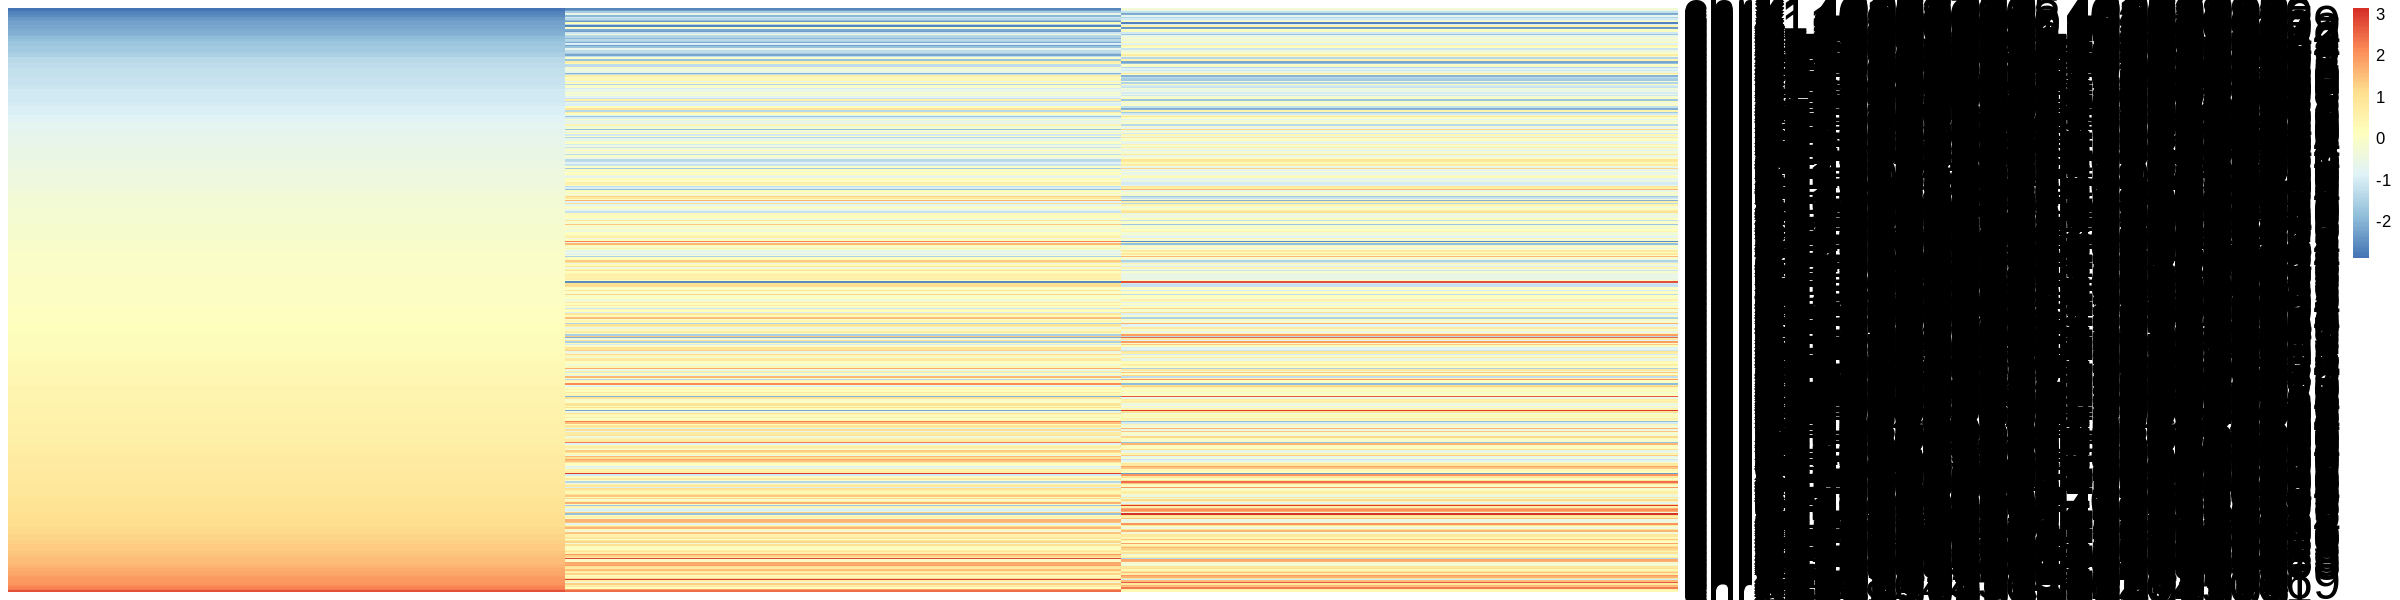

In [32]:
mat = as.data.frame(t(dat)) %>% arrange(`ASTARR vs TMPRA`)
options(repr.plot.height=5, repr.plot.width=20)
pheatmap(mat, cluster_cols = FALSE, cluster_rows = FALSE, show_colnames = FALSE, fontsize_row=30, treeheight_row = 40)

## Plot Standardized (Rank difference) (Stacked plot)

In [14]:
dat = dat_rank_diff 
dat = dat %>% 
    dplyr::select(Peak, Region, z_diff_ASTARR_WSTARR, z_diff_ASTARR_TMPRA, z_diff_WSTARR_TMPRA) %>%
    tidyr::gather(Assay, z_Rank_Diff, -Peak, -Region) %>%
    dplyr::mutate(Assay = recode(
        Assay, 
        'z_diff_ASTARR_WSTARR' = 'ASTARR vs WSTARR', 
        'z_diff_ASTARR_TMPRA'  = 'ASTARR vs TMPRA',
        'z_diff_WSTARR_TMPRA'  = 'WSTARR vs TMPRA'
    ))

dat_sum = dat %>%
    group_by(Peak) %>%
    summarise(Sum = sum(abs(z_Rank_Diff)), .groups="drop") %>% 
    arrange(Sum)

head(dat_sum)

Peak,Sum
<chr>,<dbl>
chrX_48996933_48997220,0.03472452
chr8_127898363_127899746,0.07149934
chr11_61617361_61617596,0.07354965
chrX_48767445_48768224,0.07354965
chrX_48573742_48575194,0.10604392
chr8_127933782_127935351,0.10827416


In [15]:
dat$Peak = factor(dat$Peak, levels=unique(dat_sum$Peak))
gpt = ggplot(dat, aes(x=Peak, y=abs(z_Rank_Diff), fill=Assay)) + 
    geom_bar(stat = "identity") +
    labs(y="Standardized Rank Difference", title="Stacked(Rank Differences)") +
    theme_cowplot() + 
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=20),
          axis.title.y = element_text(size=20),
          title =element_text(size=30, face='bold'))
          #legend.position = "none")

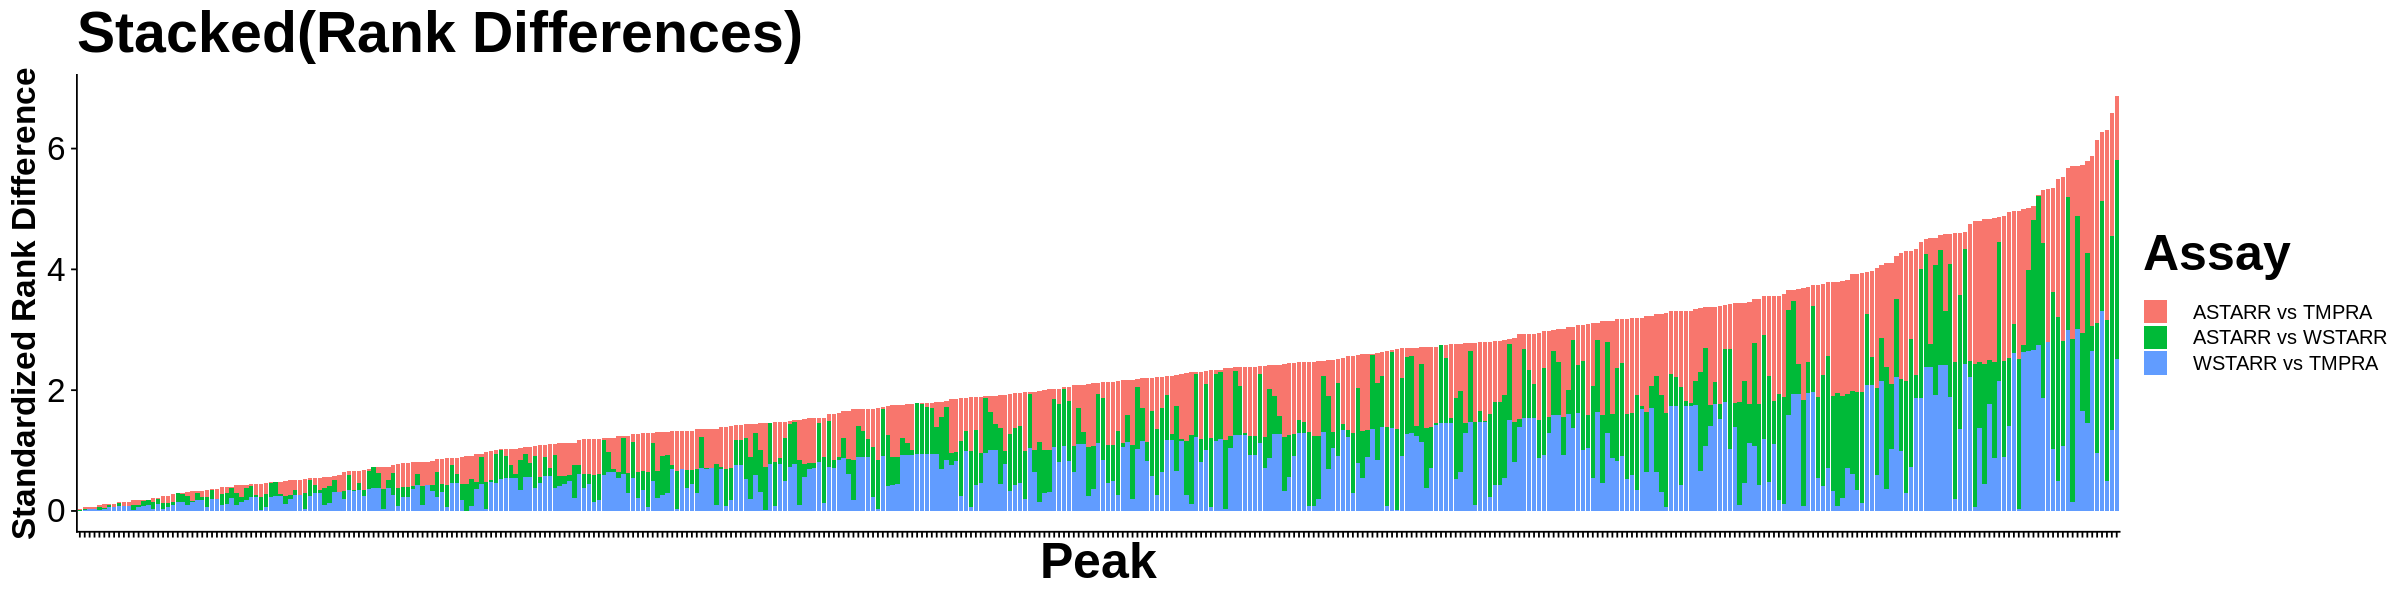

In [16]:
options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

In [17]:
dat_sum$Peak = factor(dat_sum$Peak, levels=unique(dat_sum$Peak))
gpt = ggplot(dat_sum, aes(x=Peak, y=Sum)) + 
    geom_bar(stat = "identity") +
    labs(y="Standardized Rank Difference", title="Sum(Rank Differences)") +
    theme_cowplot() + 
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=20),
          axis.title.y = element_text(size=20),
          title =element_text(size=30, face='bold'))
          #legend.position = "none")

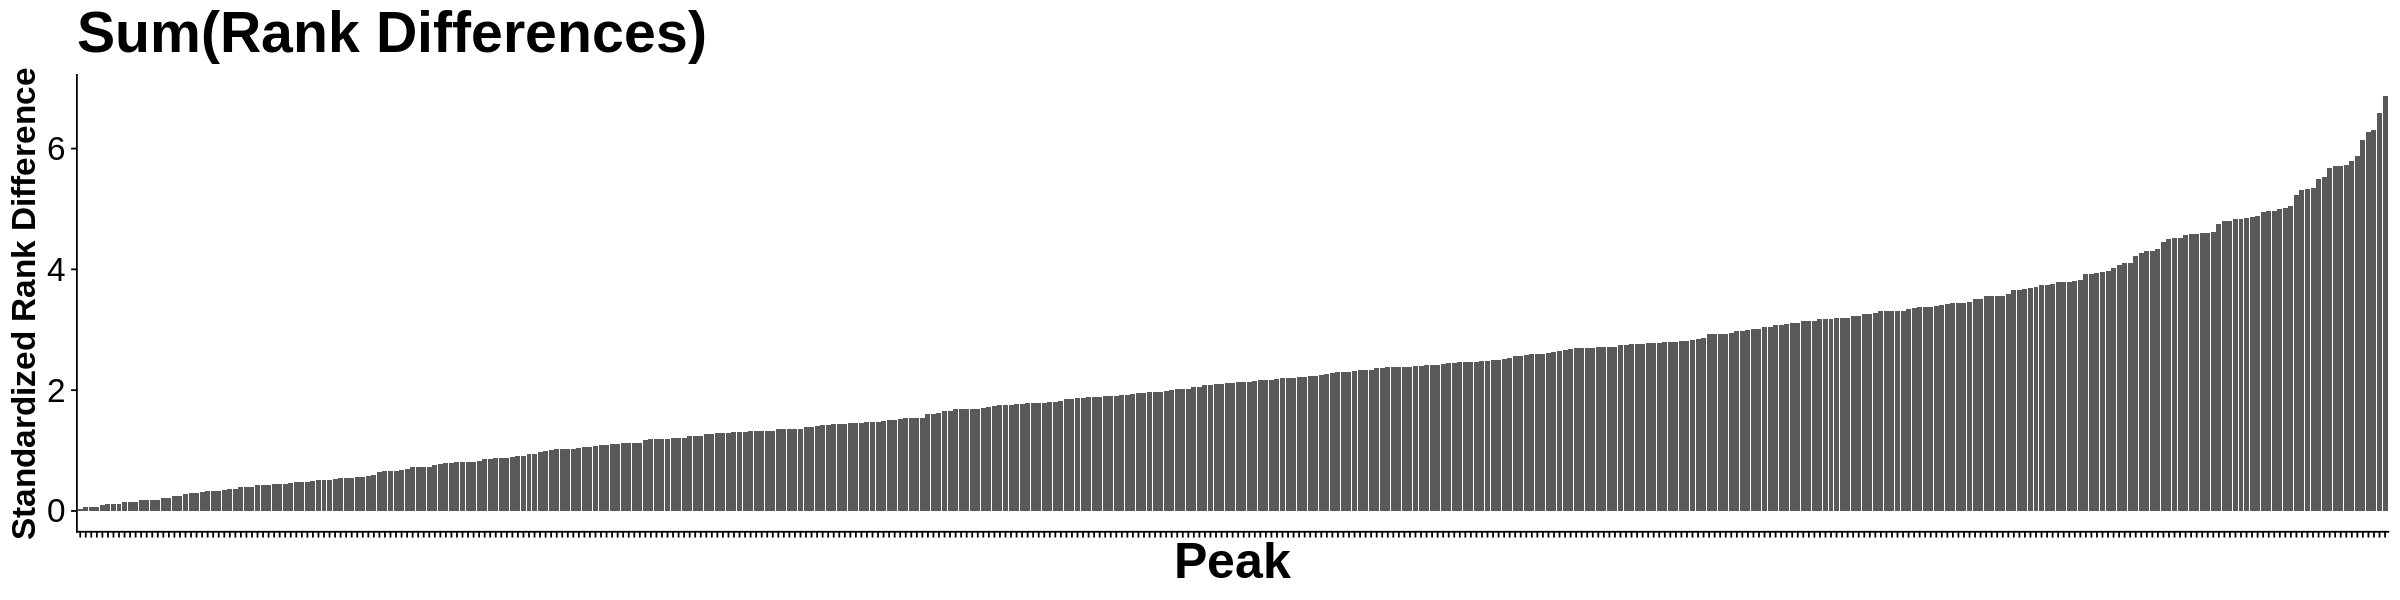

In [18]:
options(repr.plot.height=5, repr.plot.width=20)
print(gpt)